Merged Data Sample:
   Year     Month  Total Blood Smears Examined for Malaria  \
0  2019   January                                      186   
1  2019  February                                      214   
2  2019     March                                      213   
3  2019     April                                      342   
4  2019       May                                      381   

   Malaria (Microscopy Tests ) - Plasmodium Vivax test positive  \
0                                                  0              
1                                                  0              
2                                                  0              
3                                                  0              
4                                                  2              

   Malaria (Microscopy Tests ) - Plasmodium Falciparum test positive  \
0                                                  0                   
1                                                  0        

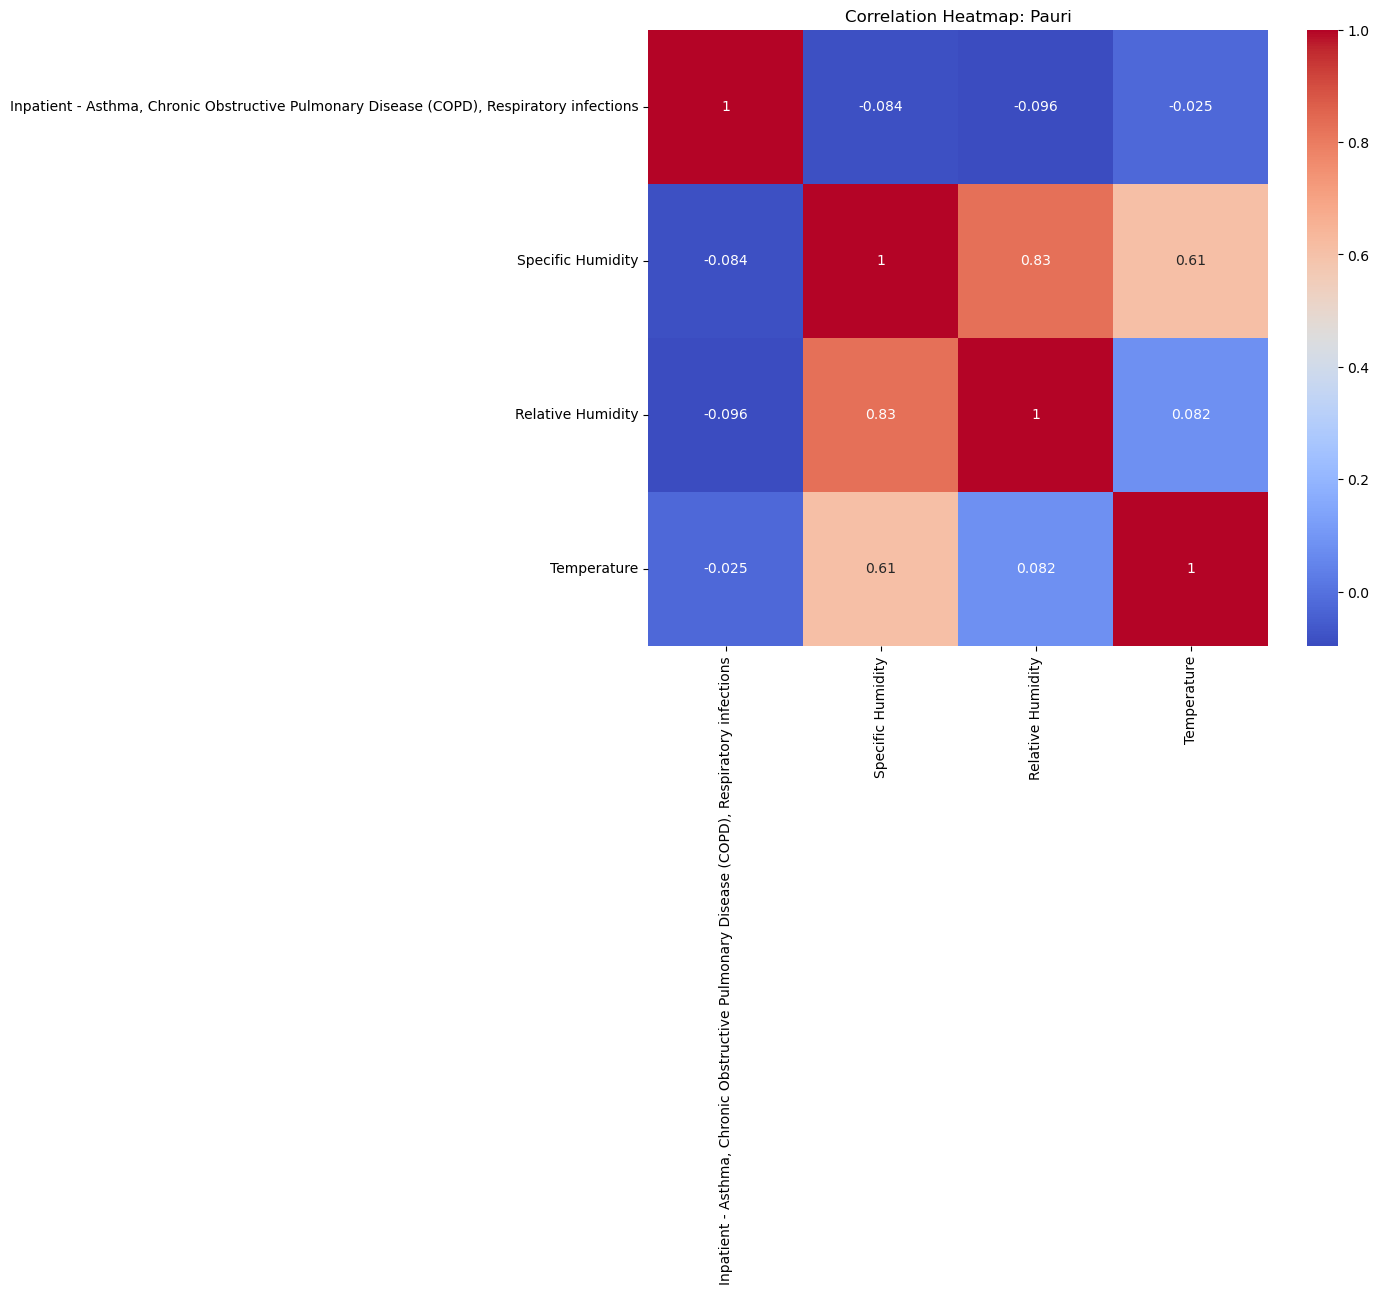

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === STEP 1: Load files ===

disease_file = "malaria_filtered.xlsx"
weather_file = "weather_filtered.xlsx"

# For test: Pick one district only
test_district = 'Pauri'  # Replace this with any district name you want to test

disease_df = pd.read_excel(disease_file, sheet_name=test_district)
weather_df = pd.read_excel(weather_file, sheet_name=test_district)

# Add Temperature column only (do not use Temperature Range for analysis)
weather_df['Temperature'] = weather_df['T2M']

# === STEP 2: Merge disease & weather data ===

merged_df = pd.merge(disease_df, weather_df, on=['Year', 'Month'])

# === STEP 3: Check merged data ===

print("Merged Data Sample:")
print(merged_df.head())

# === STEP 4: Quick correlation heatmap ===

# Identify columns automatically
disease_cols = [col for col in merged_df.columns if 'Disease' in col or col in ['Malaria','Dengue','TB','Asthma','Typhoid','Diarrhea','Hepatitis','Dehydration']] 
weather_cols = ['Specific Humidity', 'Relative Humidity', 'Temperature']

# Compute correlation matrix (exclude Temperature Range)
corr = merged_df[disease_cols + weather_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title(f"Correlation Heatmap: {test_district}")
plt.show()

Combined dataset shape: (1560, 19)
   Year     Month  Total Blood Smears Examined for Malaria  \
0  2019   January                                      206   
1  2019  February                                      297   
2  2019     March                                      233   
3  2019     April                                      172   
4  2019       May                                      337   

   Malaria (Microscopy Tests ) - Plasmodium Vivax test positive  \
0                                                  0              
1                                                  0              
2                                                  0              
3                                                  0              
4                                                  0              

   Malaria (Microscopy Tests ) - Plasmodium Falciparum test positive  \
0                                                  0                   
1                                            

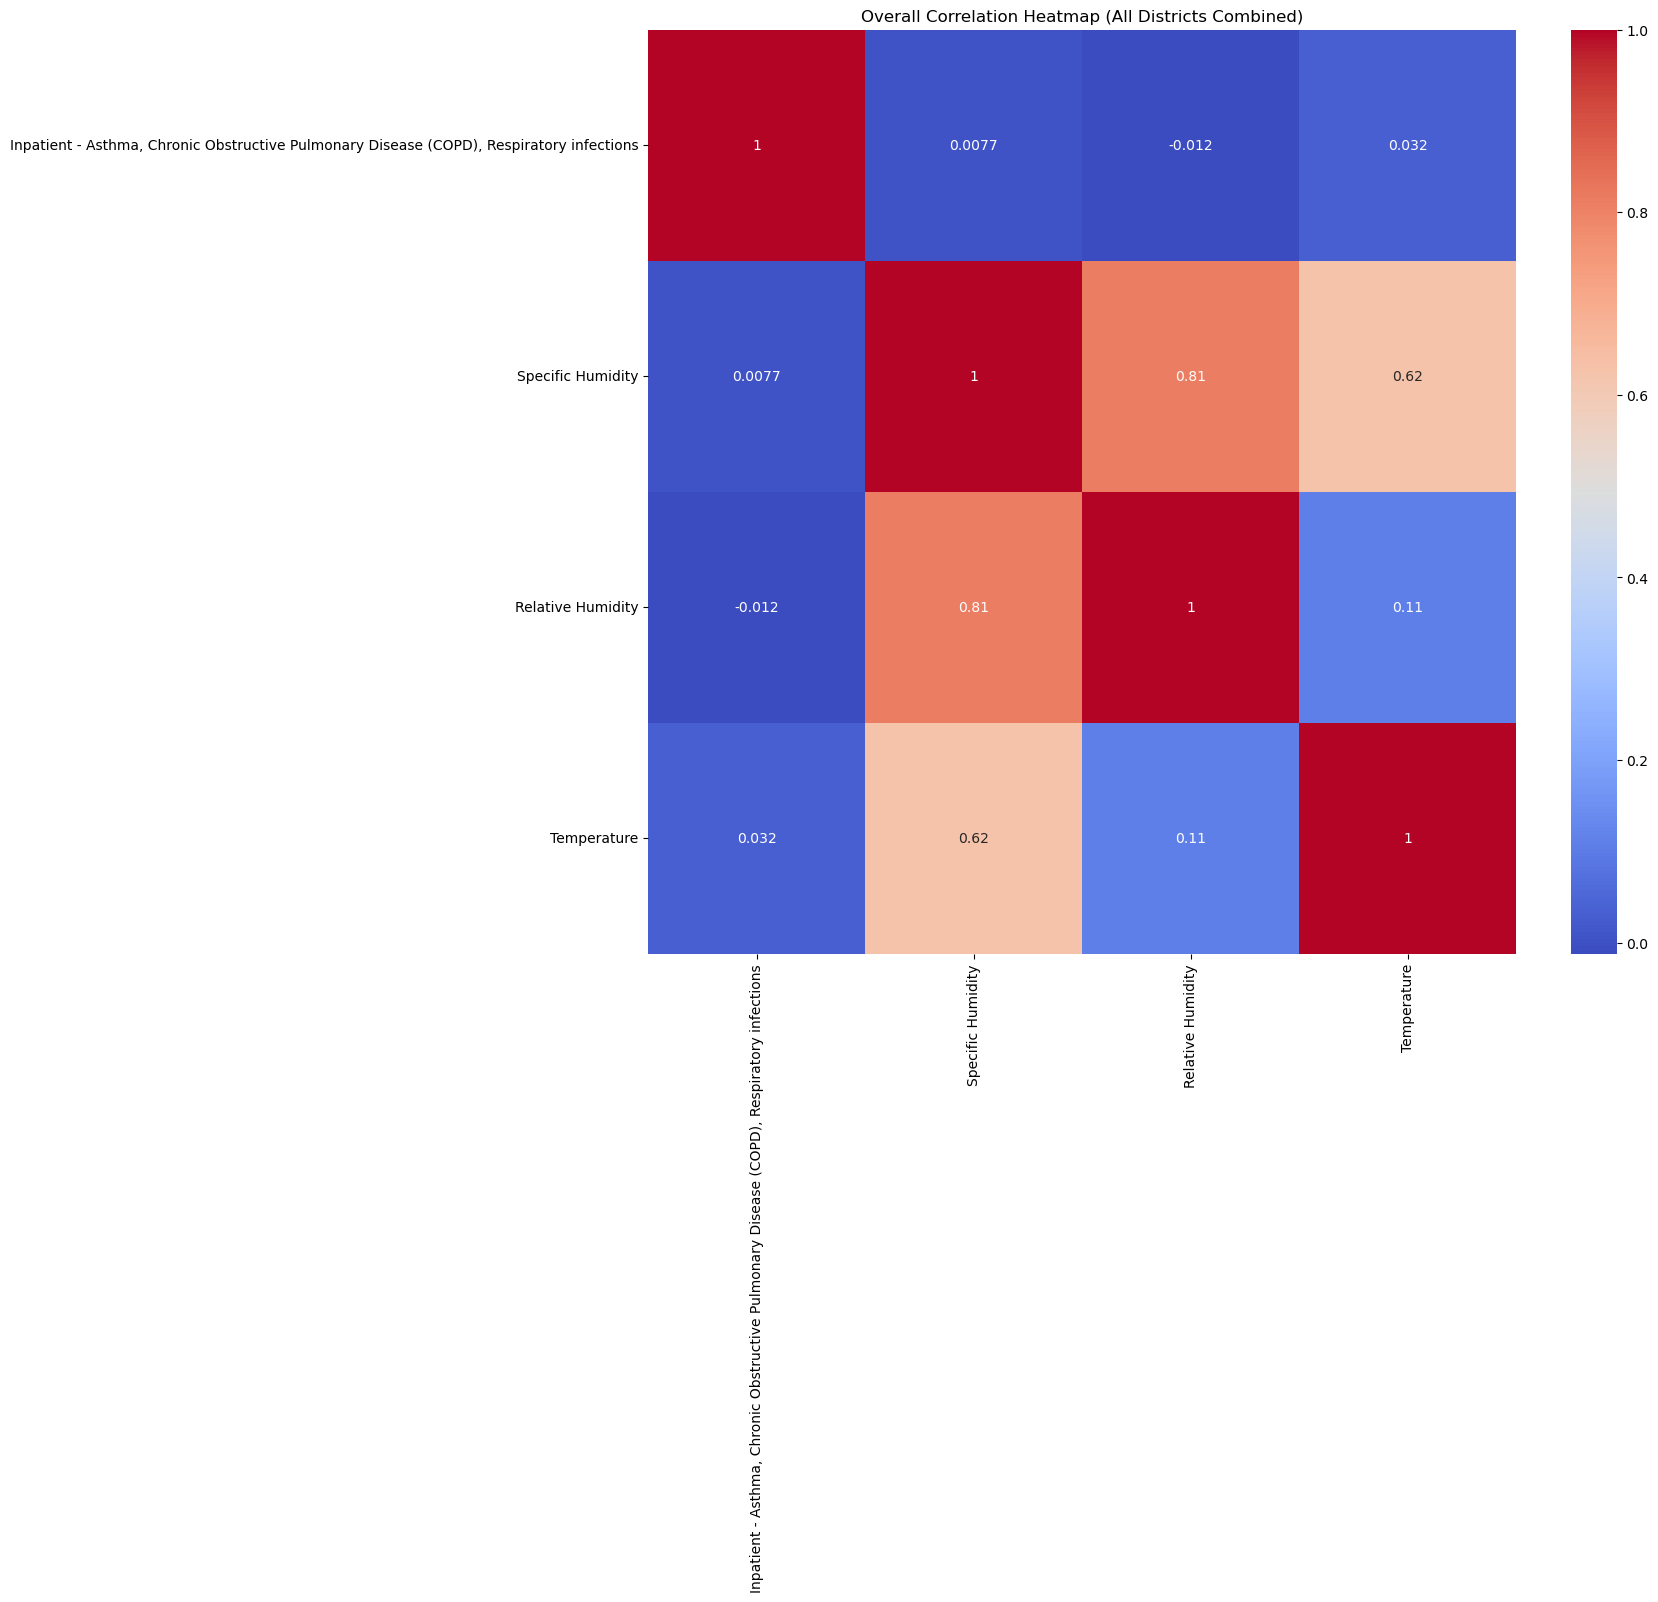

Merged data saved to 'merged_disease_weather_data.csv'


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your files
disease_file = "malaria_filtered.xlsx"
weather_file = "weather_filtered.xlsx"

# Get all district sheet names
disease_sheets = pd.ExcelFile(disease_file).sheet_names
weather_sheets = pd.ExcelFile(weather_file).sheet_names

# Initialize list to store merged data for all districts
merged_data = []

# Loop over districts
for district in disease_sheets:
    if district not in weather_sheets:
        print(f"Skipping {district} as it's not found in weather file")
        continue
    
    disease_df = pd.read_excel(disease_file, sheet_name=district)
    weather_df = pd.read_excel(weather_file, sheet_name=district)
    weather_df['Temperature'] = weather_df['T2M']

    # Merge on Year and Month
    merged_df = pd.merge(disease_df, weather_df, on=['Year', 'Month'])
    merged_df['District'] = district  # keep track of district
    merged_data.append(merged_df)

# Combine all districts into one dataframe
full_df = pd.concat(merged_data, ignore_index=True)

# Inspect combined data
print("Combined dataset shape:", full_df.shape)
print(full_df.head())

# Identify columns
disease_cols = [col for col in full_df.columns if 'Disease' in col or col in ['Malaria','Dengue','TB','Asthma','Typhoid','Diarrhea','Hepatitis','Dehydration']] 
weather_cols = ['Specific Humidity', 'Relative Humidity', 'Temperature']

# Compute full correlation matrix (exclude Temperature Range)
corr = full_df[disease_cols + weather_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Overall Correlation Heatmap (All Districts Combined)")
plt.show()

# Optional: save merged data for later modeling
full_df.to_csv("merged_disease_weather_data.csv", index=False)
print("Merged data saved to 'merged_disease_weather_data.csv'")

In [33]:
final_df_ = pd.read_csv("merged_disease_weather_data.csv")
# Display the final DataFrame
print("Final DataFrame shape:", final_df.shape)

Final DataFrame shape: (1560, 19)


In [34]:
final_df_.head()

Year     Month  Total Blood Smears Examined for Malaria  \
0  2019   January                                      206   
1  2019  February                                      297   
2  2019     March                                      233   
3  2019     April                                      172   
4  2019       May                                      337   

   Malaria (Microscopy Tests ) - Plasmodium Vivax test positive  \
0                                                  0              
1                                                  0              
2                                                  0              
3                                                  0              
4                                                  0              

   Malaria (Microscopy Tests ) - Plasmodium Falciparum test positive  \
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

   Inpatient - Malaria  Inpatient - Dengue  Inpatient - Typhoid  \
0                    0                   0                    3   
1                    0                   0                    1   
2                   -1                  -1                    2   
3                    0                   0                    3   
4                    0                   0                    2   

   Inpatient - Asthma, Chronic Obstructive Pulmonary Disease (COPD), Respiratory infections  \
0                                                 40                                          
1                                                 56                                          
2                                                 34                                          
3                                                 29                                          
4                                                 41                                          

   Inpatient - Tuberculosis  Inpatient - Diarrhea with dehydration  \
0                         0                                     19   
1                         0                                      6   
2                         2                                      9   
3                         1                                     36   
4                         2                                     28   

   Inpatient - Hepatitis  Specific Humidity  Relative Humidity        T2M  \
0                      0           3.128710          56.571613   2.498387   
1                      0           4.086786          66.315000   3.446786   
2                     -1           4.672258          59.078710   7.243226   
3                      0           6.476667          52.977000  14.260000   
4                      3           6.067097          40.951613  17.555806   

     T2M_MAX    T2M_MIN  Temperature   District  
0   9.310645  -2.638387     2.498387  Bageshwar  
1   9.717143  -2.168214     3.446786  Bageshwar  
2  14.191935   0.214839     7.243226  Bageshwar  
3  21.330000   7.779000    14.260000  Bageshwar  
4  24.924516  10.151290    17.555806  Bageshwar

In [35]:
final_df_.columns

Index(['Year', 'Month', 'Total Blood Smears Examined for Malaria',
       'Malaria (Microscopy Tests ) - Plasmodium Vivax test positive',
       'Malaria (Microscopy Tests ) - Plasmodium Falciparum test positive',
       'Inpatient - Malaria', 'Inpatient - Dengue', 'Inpatient - Typhoid',
       'Inpatient - Asthma, Chronic Obstructive Pulmonary Disease (COPD), Respiratory infections',
       'Inpatient - Tuberculosis', 'Inpatient - Diarrhea with dehydration',
       'Inpatient - Hepatitis', 'Specific Humidity', 'Relative Humidity',
       'T2M', 'T2M_MAX', 'T2M_MIN', 'Temperature', 'District'],
      dtype='object')

In [36]:
final_df_.columns = [
    'Year', 'Month', 'Malaria_Sample', 'Malaria_vivax',
    'Malaria_falciparum', 'Malaria_inpatient',
    'Dengue_inpatient', 'Typhoid_inpatient', 'COPD_Asthma_inpatient',
    'TB_inpatient', 'DD_inpatient', 'Hepatitis_inpatient',
    'specific_humidity', 'relative_humidity', 'temperature', 't2m_max', 't2m_min', 'temp', 'District'
    ]

In [37]:
final_df_.head()

Year     Month  Malaria_Sample  Malaria_vivax  Malaria_falciparum  \
0  2019   January             206              0                   0   
1  2019  February             297              0                   0   
2  2019     March             233              0                   0   
3  2019     April             172              0                   0   
4  2019       May             337              0                   0   

   Malaria_inpatient  Dengue_inpatient  Typhoid_inpatient  \
0                  0                 0                  3   
1                  0                 0                  1   
2                 -1                -1                  2   
3                  0                 0                  3   
4                  0                 0                  2   

   COPD_Asthma_inpatient  TB_inpatient  DD_inpatient  Hepatitis_inpatient  \
0                     40             0            19                    0   
1                     56             0             6                    0   
2                     34             2             9                   -1   
3                     29             1            36                    0   
4                     41             2            28                    3   

   specific_humidity  relative_humidity  temperature    t2m_max    t2m_min  \
0           3.128710          56.571613     2.498387   9.310645  -2.638387   
1           4.086786          66.315000     3.446786   9.717143  -2.168214   
2           4.672258          59.078710     7.243226  14.191935   0.214839   
3           6.476667          52.977000    14.260000  21.330000   7.779000   
4           6.067097          40.951613    17.555806  24.924516  10.151290   

        temp   District  
0   2.498387  Bageshwar  
1   3.446786  Bageshwar  
2   7.243226  Bageshwar  
3  14.260000  Bageshwar  
4  17.555806  Bageshwar

District: Bageshwar
Testing with district: Bageshwar


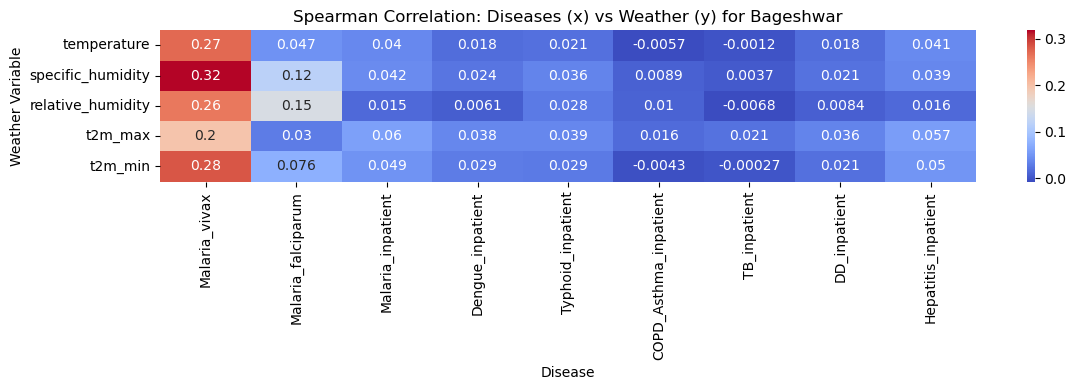

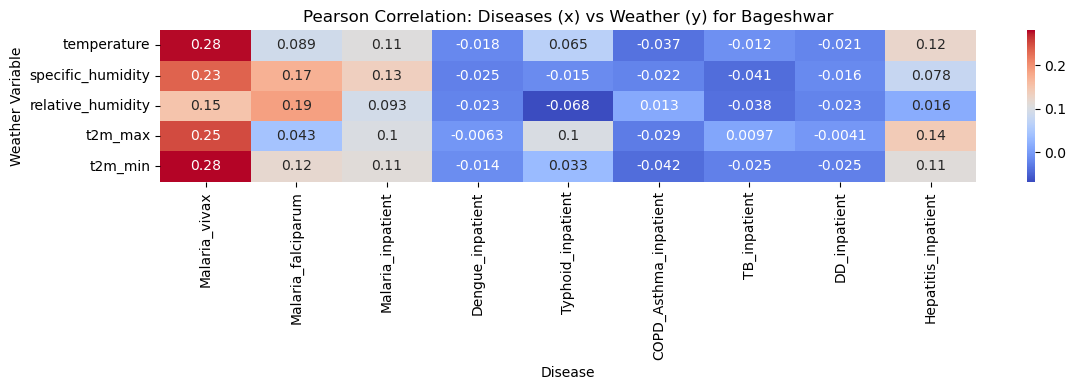

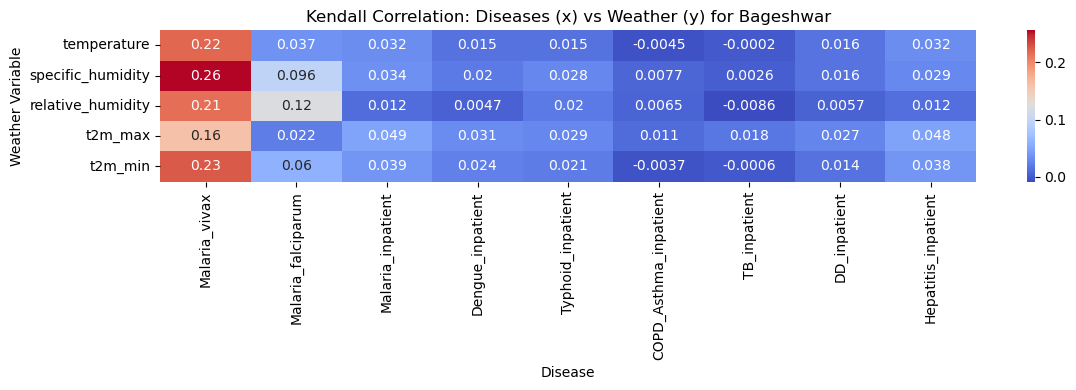

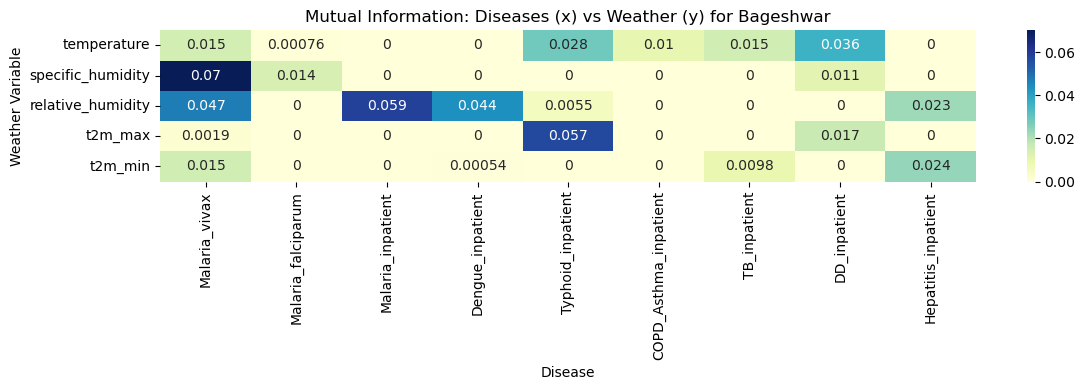

            n         r          CI95%     p-val
spearman  120 -0.044086  [-0.22, 0.14]  0.635479
Regression analysis for Malaria_vivax against weather variables
                            OLS Regression Results                            
Dep. Variable:          Malaria_vivax   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     3.407
Date:                Thu, 12 Jun 2025   Prob (F-statistic):             0.0200
Time:                        16:57:59   Log-Likelihood:                -121.44
No. Observations:                 120   AIC:                             250.9
Df Residuals:                     116   BIC:                             262.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err         

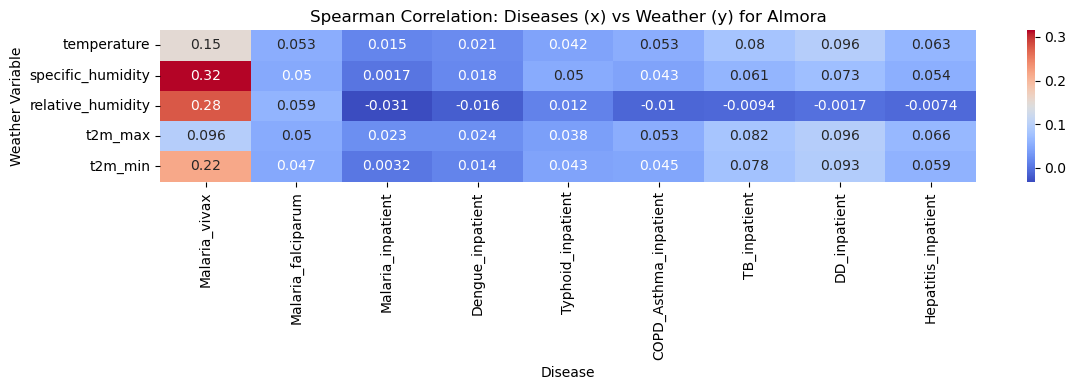

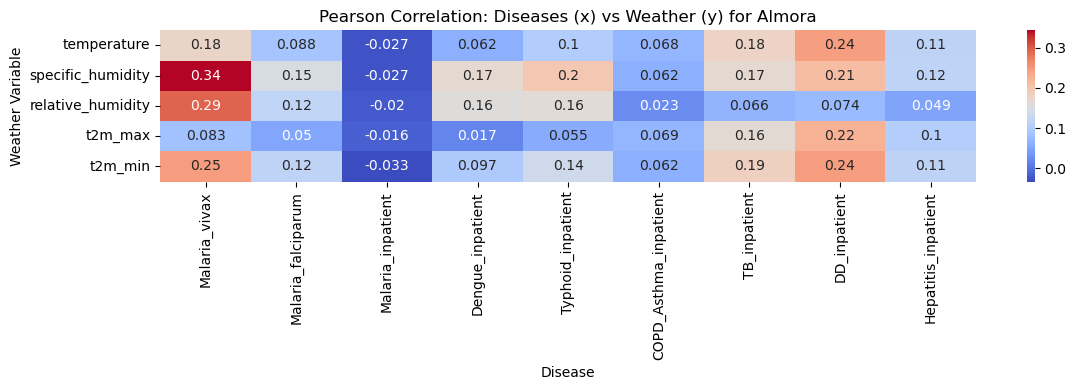

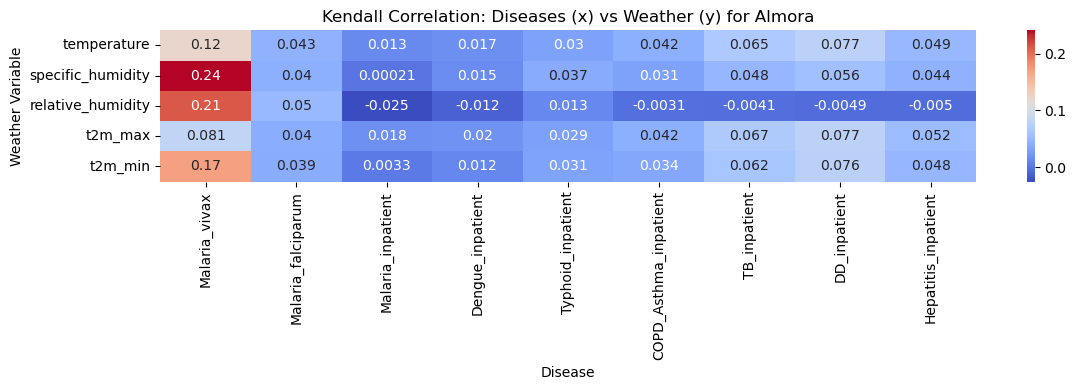

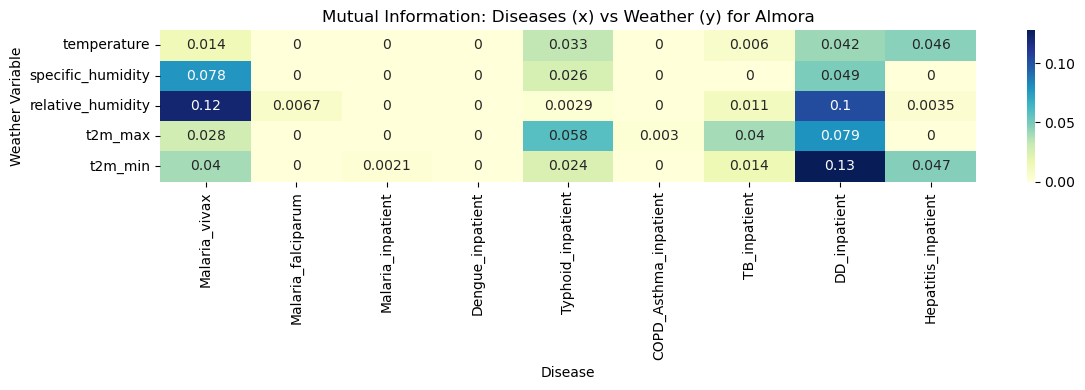

            n         r          CI95%     p-val
spearman  120 -0.064005  [-0.24, 0.12]  0.491088
Regression analysis for Malaria_vivax against weather variables
                            OLS Regression Results                            
Dep. Variable:          Malaria_vivax   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     5.402
Date:                Thu, 12 Jun 2025   Prob (F-statistic):            0.00163
Time:                        16:58:00   Log-Likelihood:                -182.03
No. Observations:                 120   AIC:                             372.1
Df Residuals:                     116   BIC:                             383.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err         

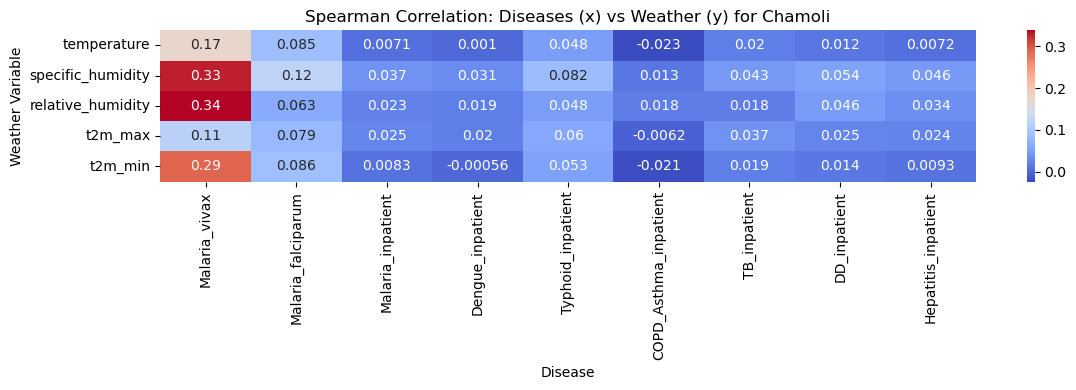

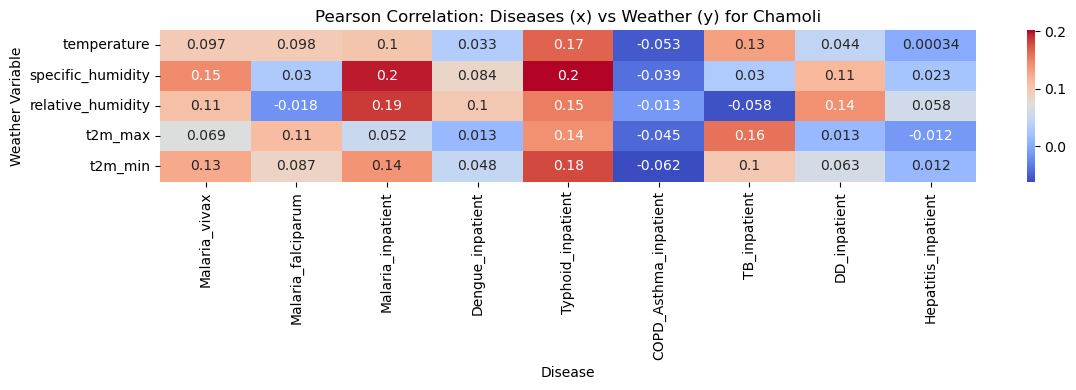

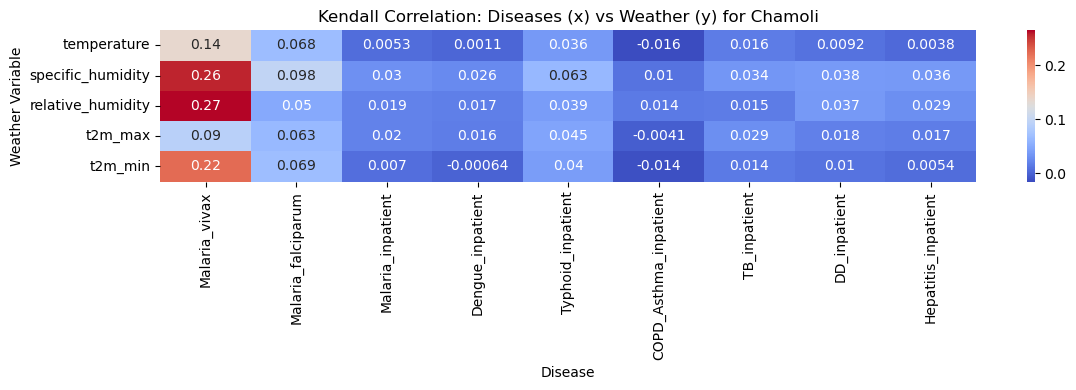

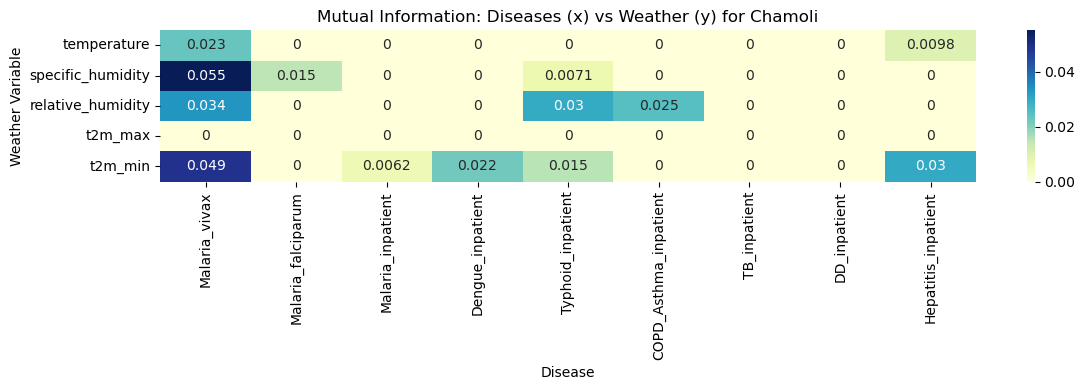

            n         r          CI95%     p-val
spearman  120 -0.087869  [-0.26, 0.09]  0.344061
Regression analysis for Malaria_vivax against weather variables
                            OLS Regression Results                            
Dep. Variable:          Malaria_vivax   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.313
Date:                Thu, 12 Jun 2025   Prob (F-statistic):              0.274
Time:                        16:58:01   Log-Likelihood:                -367.28
No. Observations:                 120   AIC:                             742.6
Df Residuals:                     116   BIC:                             753.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err         

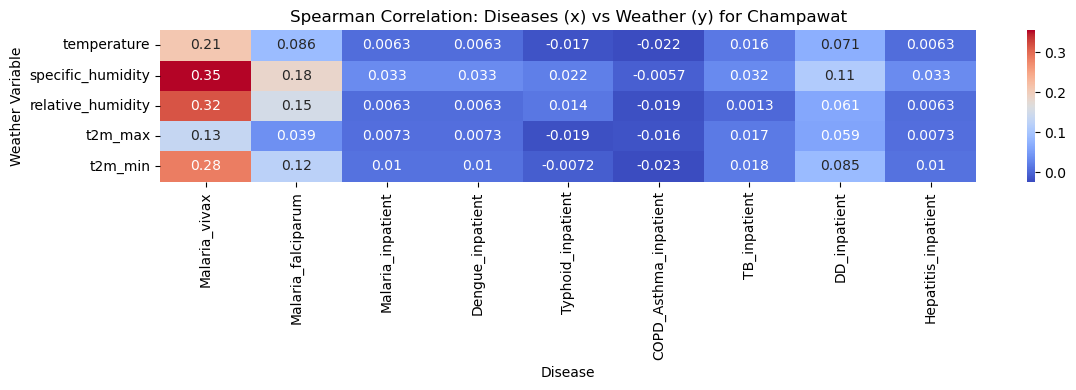

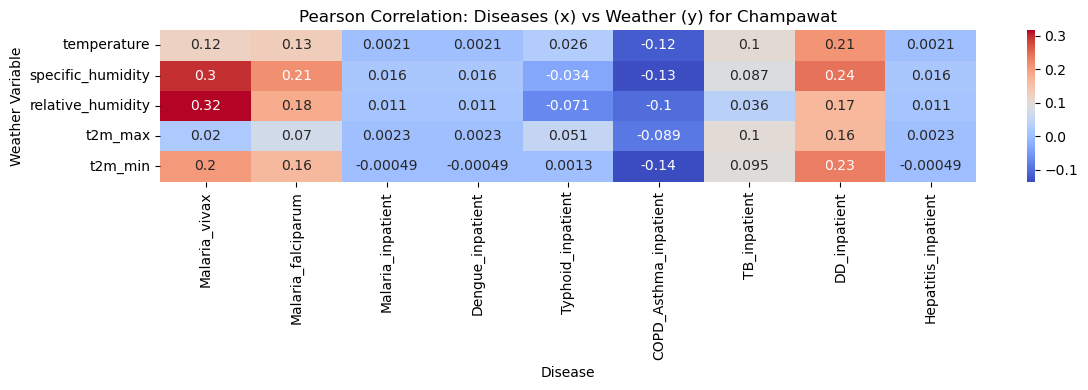

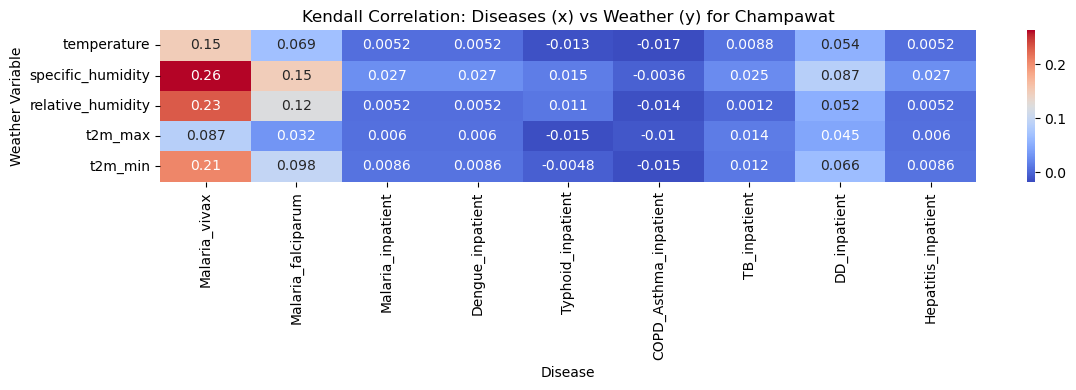

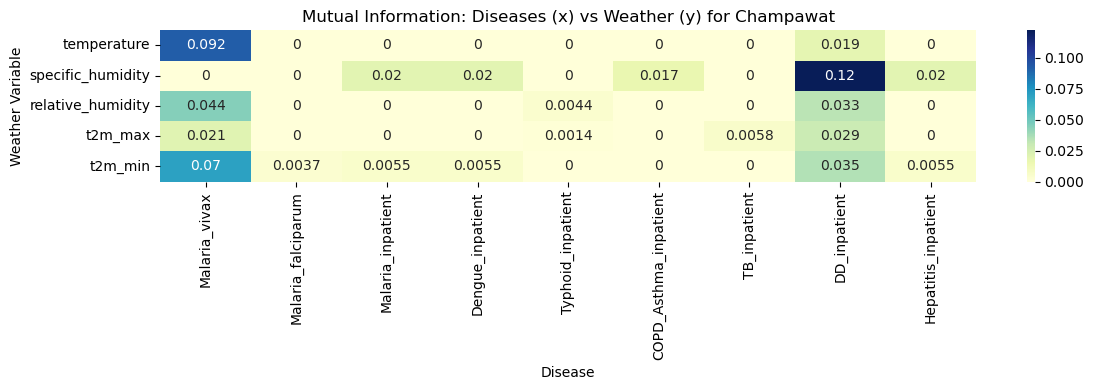

            n         r          CI95%     p-val
spearman  120 -0.118258  [-0.29, 0.06]  0.202162
Regression analysis for Malaria_vivax against weather variables
                            OLS Regression Results                            
Dep. Variable:          Malaria_vivax   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     4.687
Date:                Thu, 12 Jun 2025   Prob (F-statistic):            0.00398
Time:                        16:58:02   Log-Likelihood:                -317.52
No. Observations:                 120   AIC:                             643.0
Df Residuals:                     116   BIC:                             654.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err         

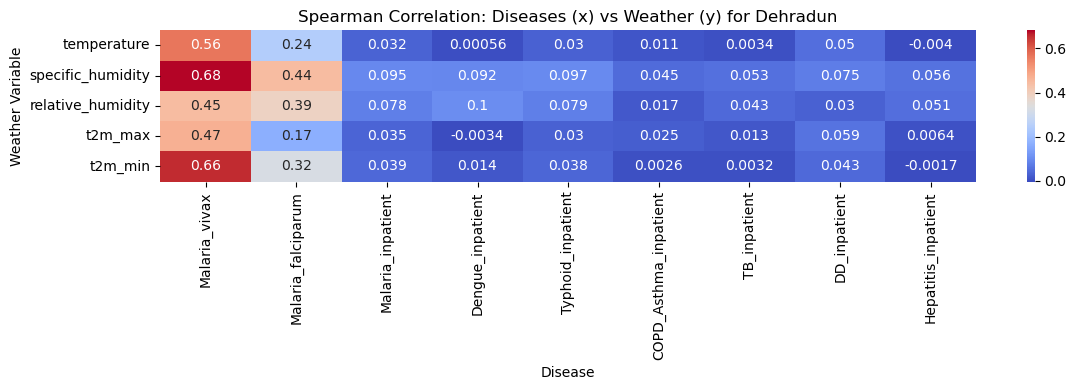

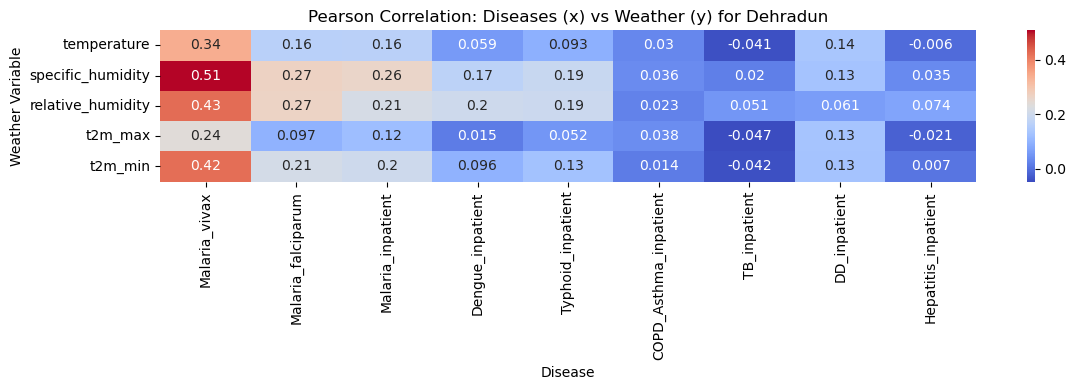

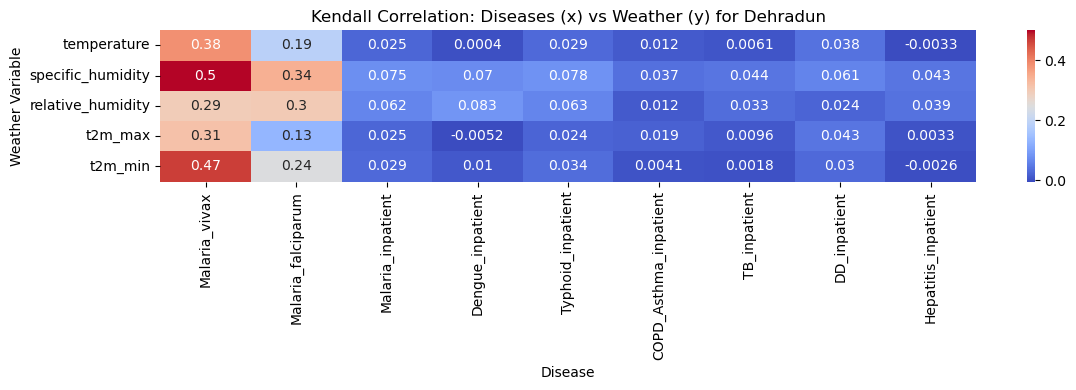

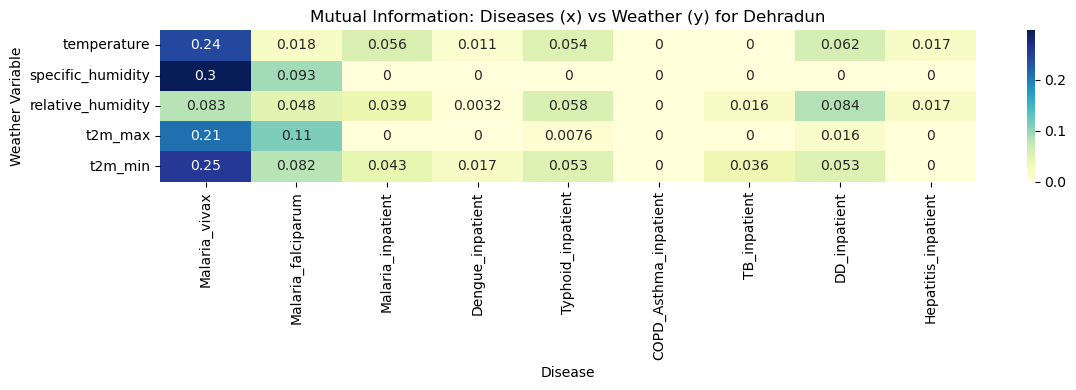

            n         r         CI95%     p-val
spearman  120 -0.082459  [-0.26, 0.1]  0.374694
Regression analysis for Malaria_vivax against weather variables
                            OLS Regression Results                            
Dep. Variable:          Malaria_vivax   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     14.09
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           6.79e-08
Time:                        16:58:04   Log-Likelihood:                -516.15
No. Observations:                 120   AIC:                             1040.
Df Residuals:                     116   BIC:                             1051.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t

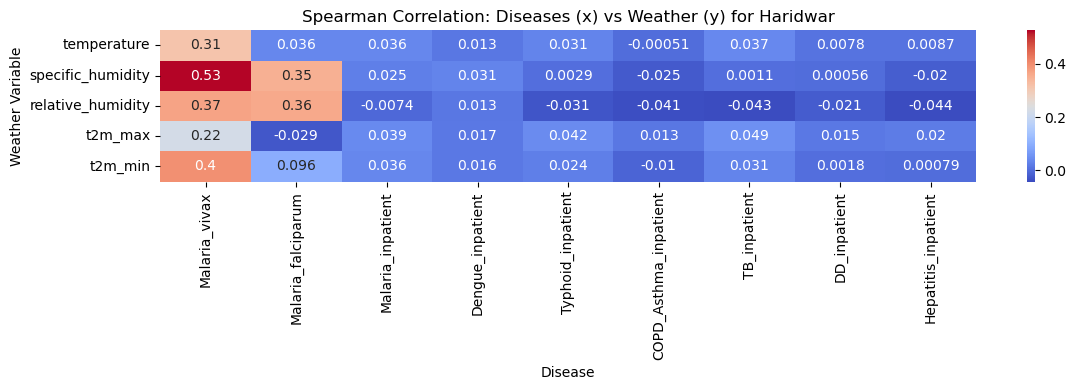

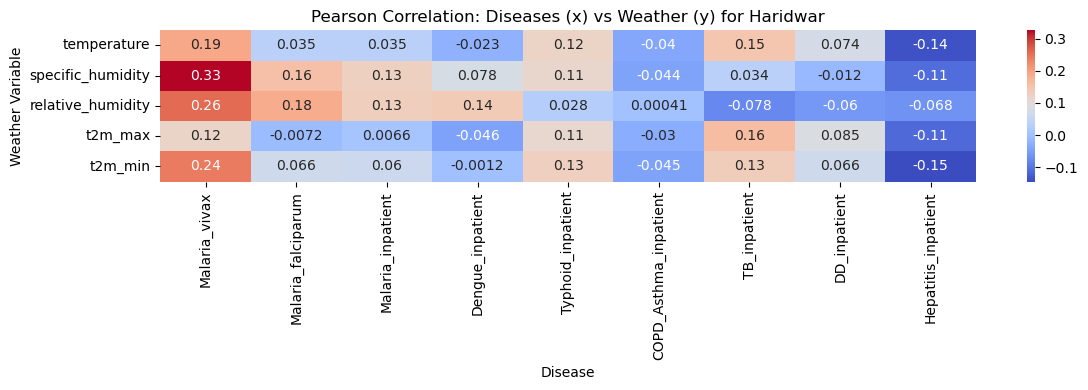

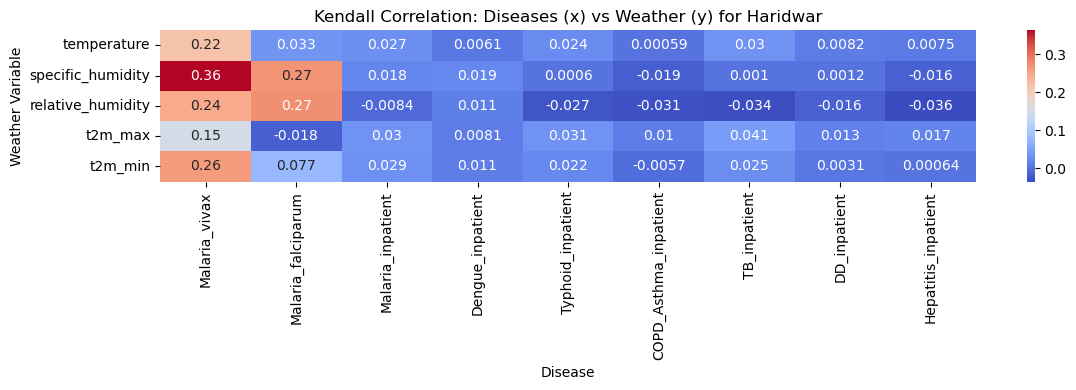

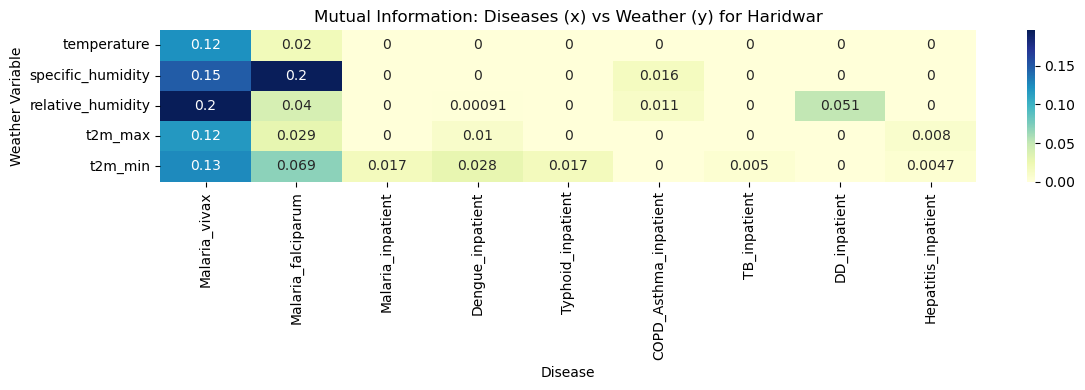

            n         r          CI95%    p-val
spearman  120 -0.013401  [-0.19, 0.17]  0.88548
Regression analysis for Malaria_vivax against weather variables
                            OLS Regression Results                            
Dep. Variable:          Malaria_vivax   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     4.907
Date:                Thu, 12 Jun 2025   Prob (F-statistic):            0.00302
Time:                        16:58:05   Log-Likelihood:                -650.27
No. Observations:                 120   AIC:                             1309.
Df Residuals:                     116   BIC:                             1320.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t

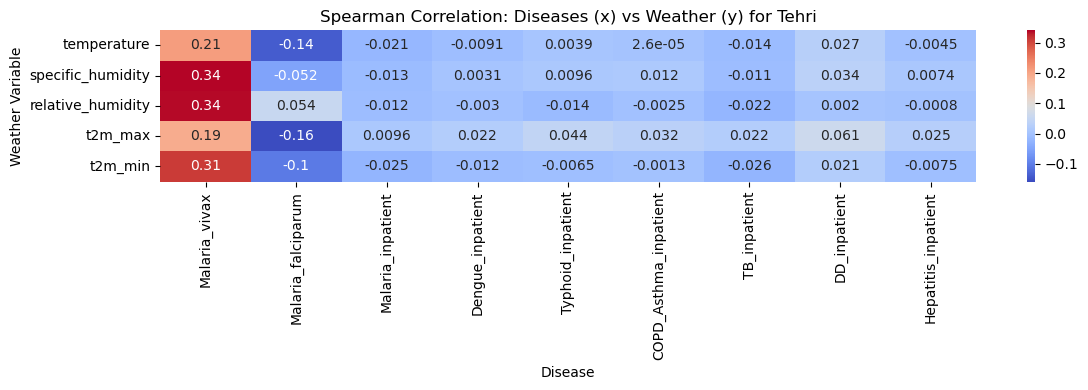

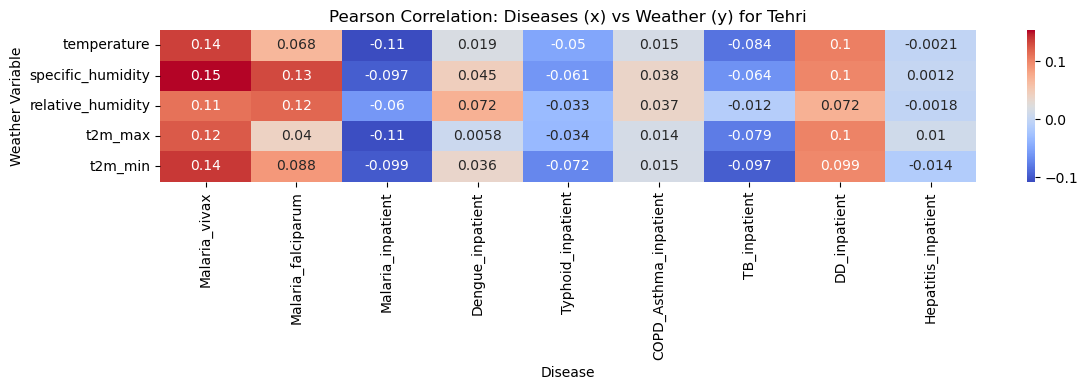

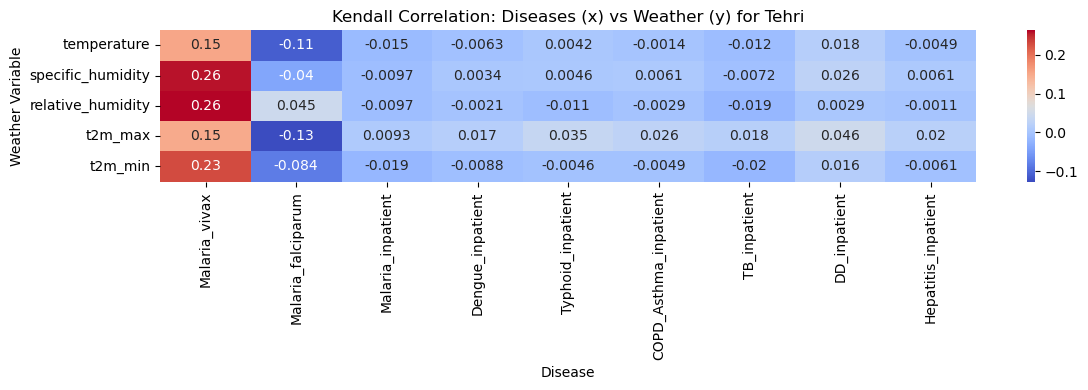

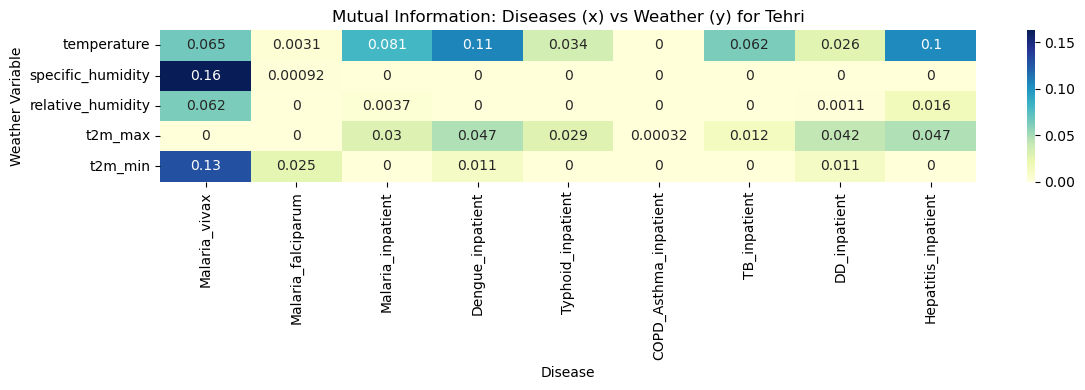

            n         r          CI95%     p-val
spearman  120 -0.048416  [-0.23, 0.13]  0.602622
Regression analysis for Malaria_vivax against weather variables
                            OLS Regression Results                            
Dep. Variable:          Malaria_vivax   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.045
Date:                Thu, 12 Jun 2025   Prob (F-statistic):              0.376
Time:                        16:58:06   Log-Likelihood:                -576.89
No. Observations:                 120   AIC:                             1162.
Df Residuals:                     116   BIC:                             1173.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err         

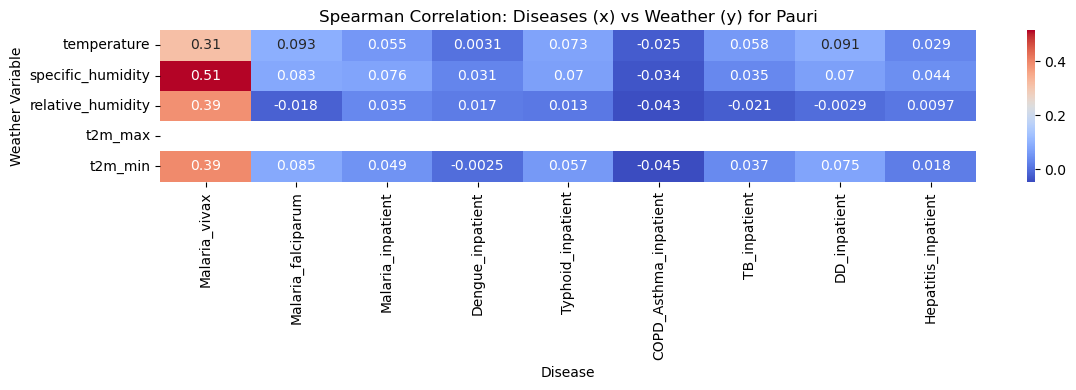

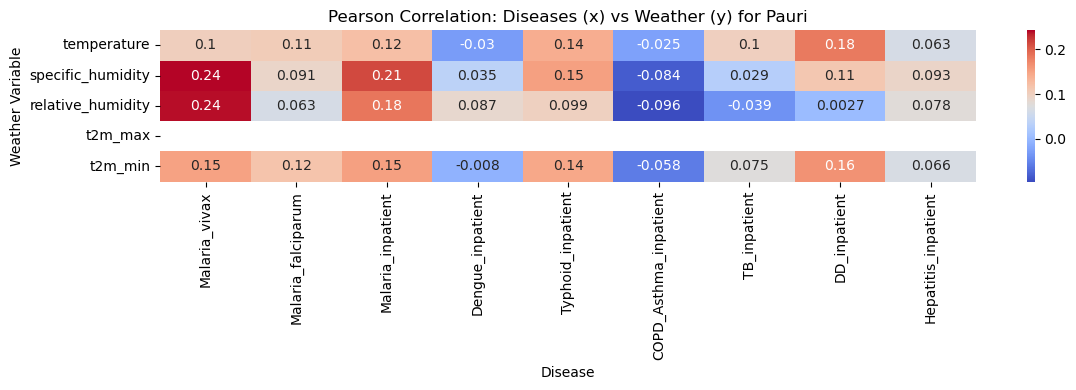

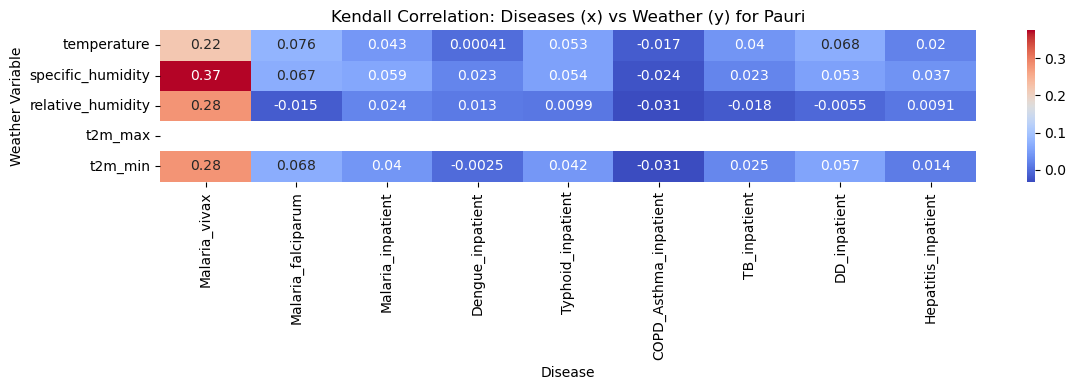

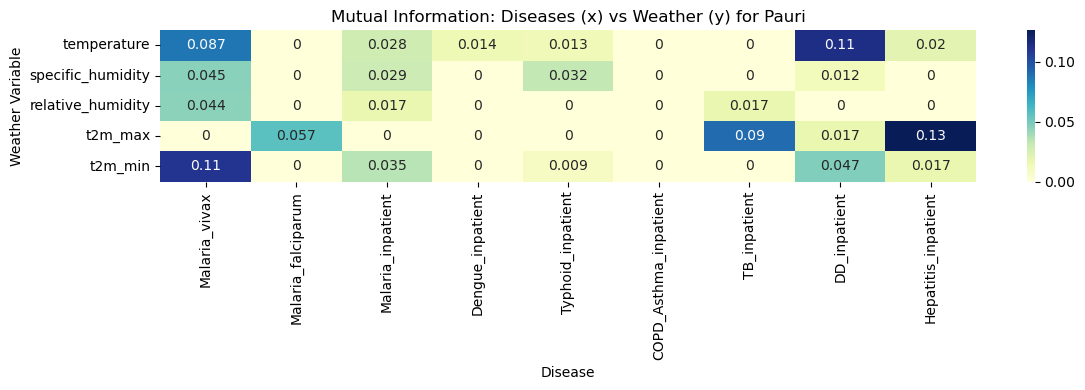

            n         r          CI95%     p-val
spearman  120 -0.049107  [-0.23, 0.13]  0.597441
Regression analysis for Malaria_vivax against weather variables
                            OLS Regression Results                            
Dep. Variable:          Malaria_vivax   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     2.647
Date:                Thu, 12 Jun 2025   Prob (F-statistic):             0.0523
Time:                        16:58:07   Log-Likelihood:                -507.66
No. Observations:                 120   AIC:                             1023.
Df Residuals:                     116   BIC:                             1034.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err         

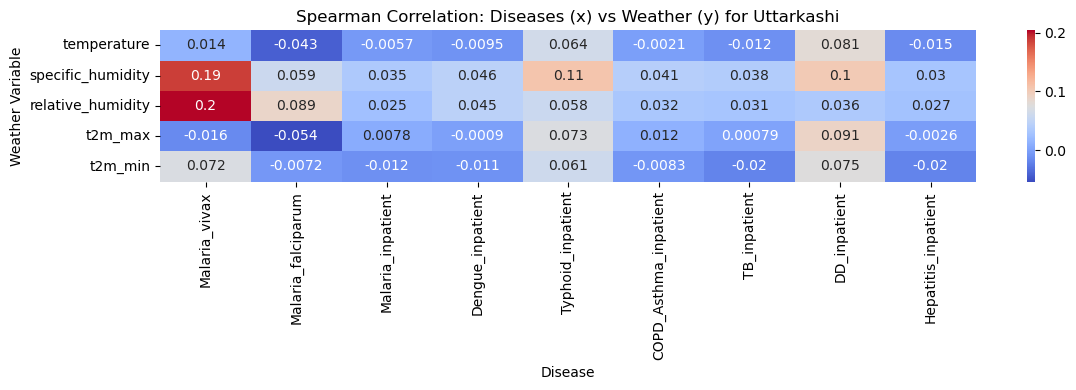

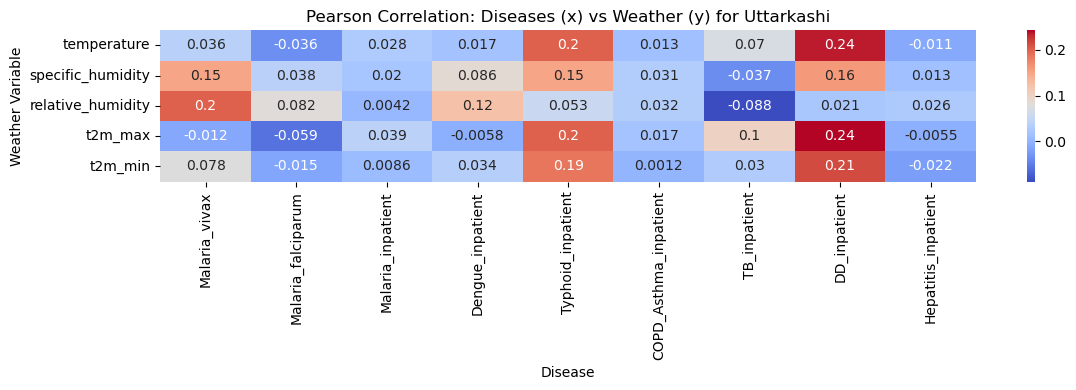

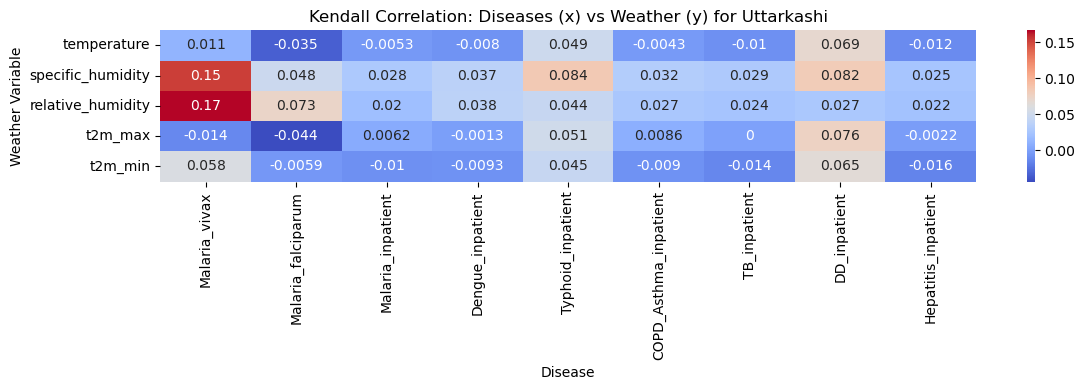

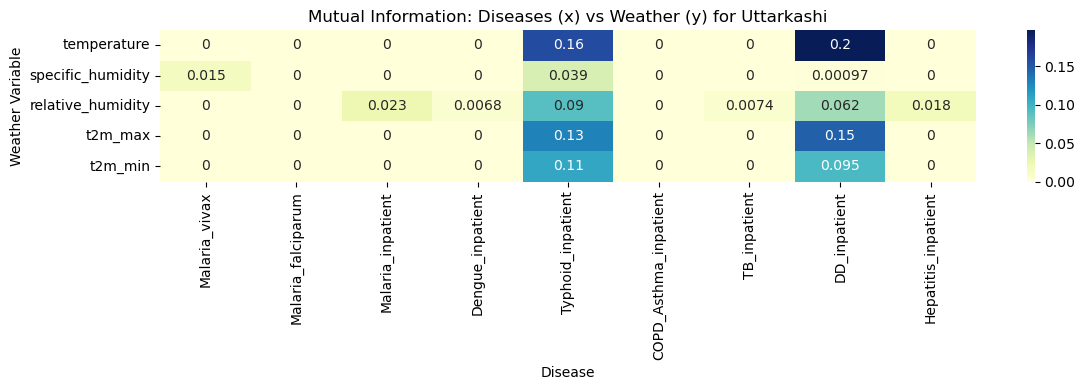

            n         r          CI95%     p-val
spearman  120 -0.101333  [-0.28, 0.08]  0.274898
Regression analysis for Malaria_vivax against weather variables
                            OLS Regression Results                            
Dep. Variable:          Malaria_vivax   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     2.516
Date:                Thu, 12 Jun 2025   Prob (F-statistic):             0.0617
Time:                        16:58:08   Log-Likelihood:                -48.494
No. Observations:                 120   AIC:                             105.0
Df Residuals:                     116   BIC:                             116.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err         

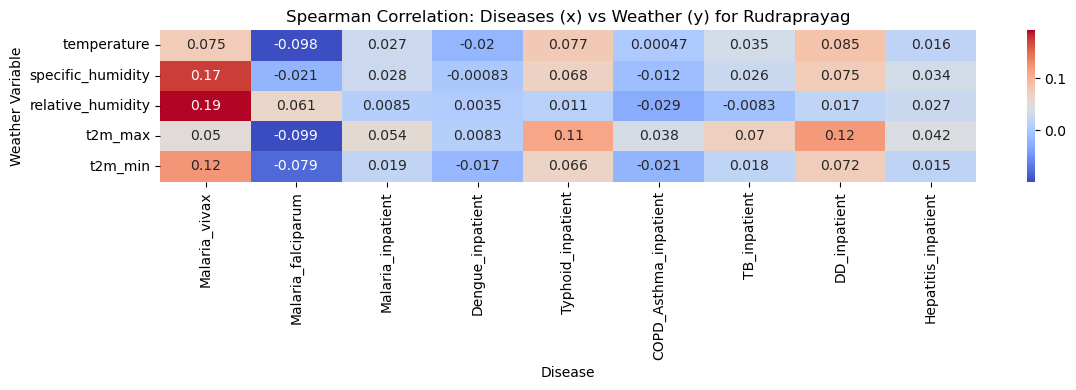

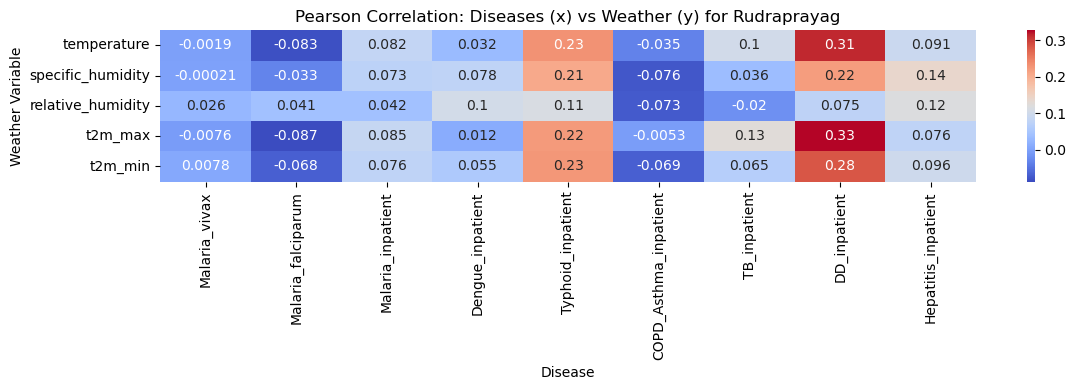

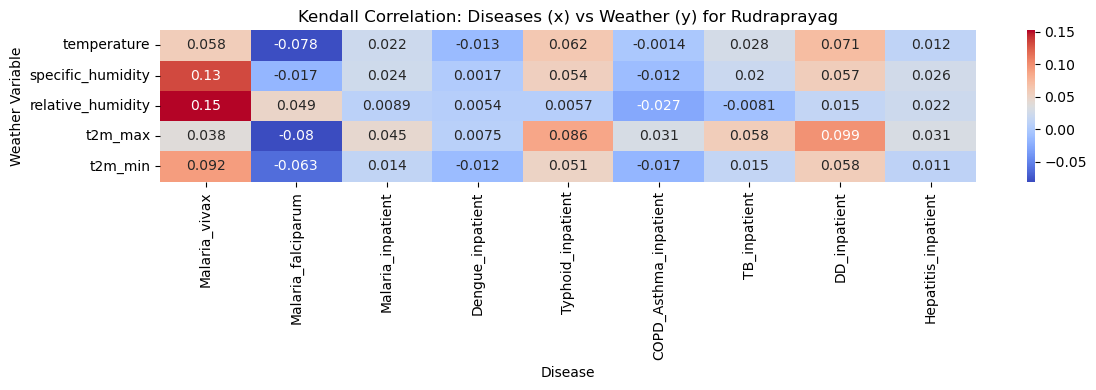

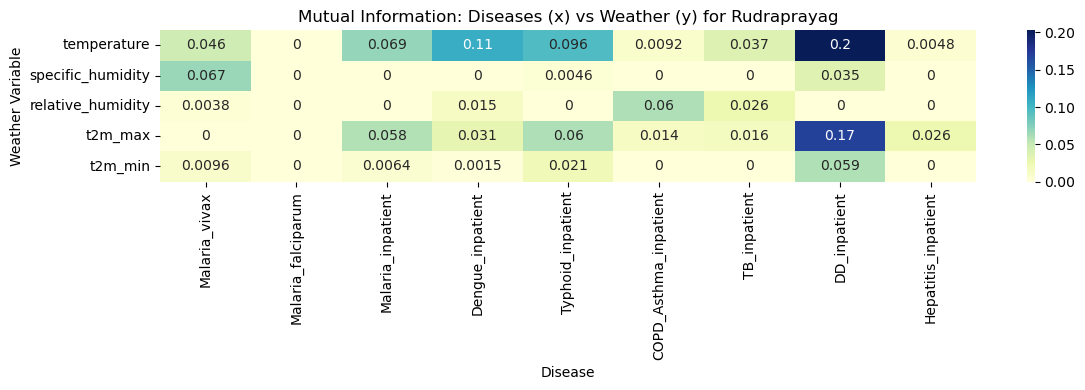

            n         r         CI95%     p-val
spearman  120 -0.025087  [-0.2, 0.16]  0.787421
Regression analysis for Malaria_vivax against weather variables
                            OLS Regression Results                            
Dep. Variable:          Malaria_vivax   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5912
Date:                Thu, 12 Jun 2025   Prob (F-statistic):              0.622
Time:                        16:58:09   Log-Likelihood:                -488.79
No. Observations:                 120   AIC:                             985.6
Df Residuals:                     116   BIC:                             996.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t

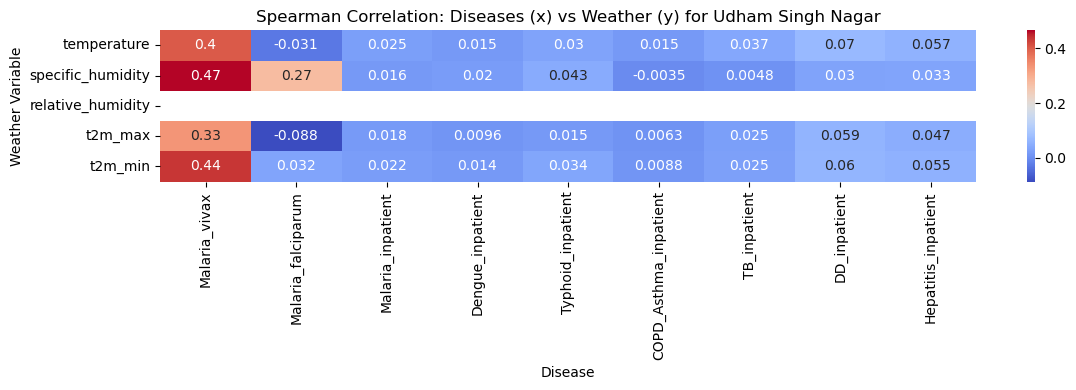

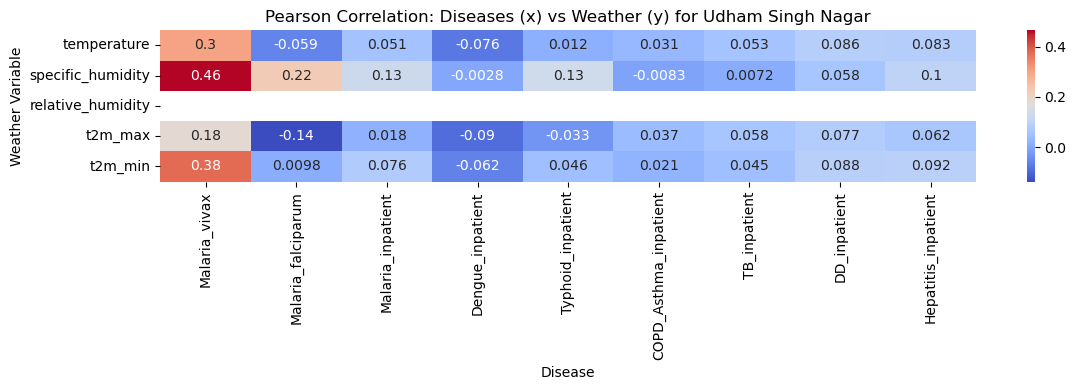

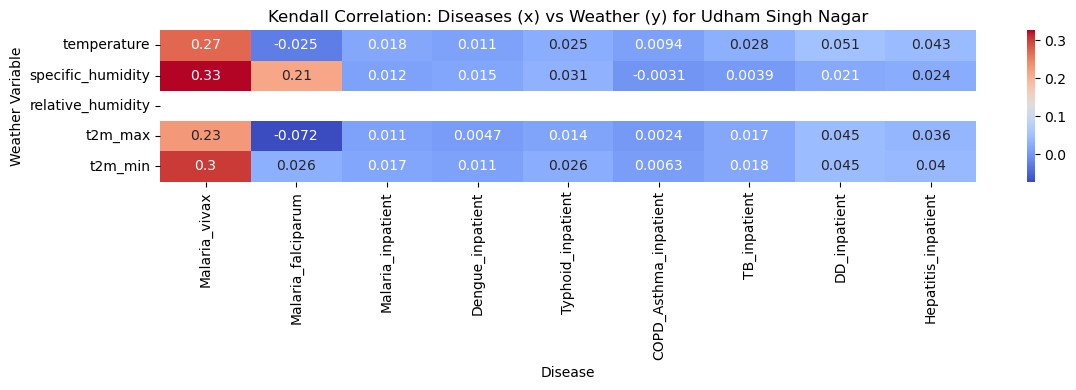

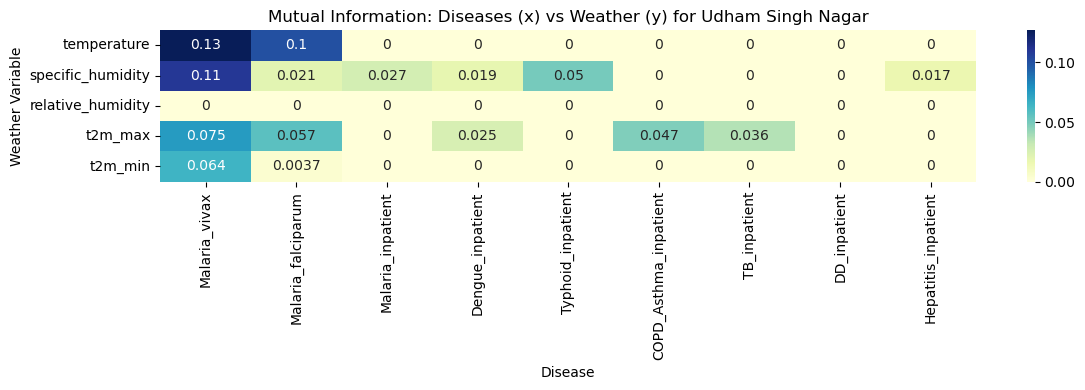

AssertionError: Data must have at least 3 non-NAN samples.

In [51]:
test_districts = final_df_['District'].unique()

for test_district in test_districts:
    print(f"District: {test_district}")
    print(f"Testing with district: {test_district}")

    final_df = final_df_[final_df_['District'] == test_district].copy()
    
    # Spearman correlation: x-axis = all diseases, y-axis = weather variables (temperature, humidity)

    # List of disease columns (update if needed)
    disease_cols = [
        'Malaria_vivax', 'Malaria_falciparum', 'Malaria_inpatient',
        'Dengue_inpatient', 'Typhoid_inpatient', 'COPD_Asthma_inpatient',
        'TB_inpatient', 'DD_inpatient', 'Hepatitis_inpatient'
    ]
    # List of weather columns
    weather_vars = ['temperature', 'specific_humidity', 'relative_humidity', 
                    't2m_max', 't2m_min']

    # Compute Spearman correlation for all diseases vs weather variables
    corr_matrix = final_df[disease_cols + weather_vars].corr(method='spearman')
    # Extract only weather rows and disease columns
    corr_subset = corr_matrix.loc[weather_vars, disease_cols]

    plt.figure(figsize=(12, 4))
    sns.heatmap(corr_subset, annot=True, cmap='coolwarm', xticklabels=disease_cols, yticklabels=weather_vars)
    plt.xlabel("Disease")
    plt.ylabel("Weather Variable")
    plt.title("Spearman Correlation: Diseases (x) vs Weather (y)" + f" for {test_district}")
    plt.tight_layout()
    plt.show()
    
    
    
    # Pearson correlation: x-axis = all diseases, y-axis = weather variables
    corr_matrix_pearson = final_df[disease_cols + weather_vars].corr(method='pearson')
    corr_subset_pearson = corr_matrix_pearson.loc[weather_vars, disease_cols]

    plt.figure(figsize=(12, 4))
    sns.heatmap(corr_subset_pearson, annot=True, cmap='coolwarm', xticklabels=disease_cols, yticklabels=weather_vars)
    plt.xlabel("Disease")
    plt.ylabel("Weather Variable")
    plt.title("Pearson Correlation: Diseases (x) vs Weather (y)" + f" for {test_district}")
    plt.tight_layout()
    plt.show()
    
    # Kendall correlation
    corr_matrix_kendall = final_df[disease_cols + weather_vars].corr(method='kendall')
    corr_subset_kendall = corr_matrix_kendall.loc[weather_vars, disease_cols]

    plt.figure(figsize=(12, 4))
    sns.heatmap(corr_subset_kendall, annot=True, cmap='coolwarm', xticklabels=disease_cols, yticklabels=weather_vars)
    plt.xlabel("Disease")
    plt.ylabel("Weather Variable")
    plt.title("Kendall Correlation: Diseases (x) vs Weather (y)" + f" for {test_district}")
    plt.tight_layout()
    plt.show()
    
    from sklearn.feature_selection import mutual_info_regression

    mi_results = []
    for weather in weather_vars:
        mi_row = []
        for disease in disease_cols:
            mi = mutual_info_regression(
                final_df[[weather]].fillna(0), 
                final_df[disease].fillna(0)
            )[0]
            mi_row.append(mi)
        mi_results.append(mi_row)

    mi_df = pd.DataFrame(mi_results, index=weather_vars, columns=disease_cols)

    plt.figure(figsize=(12, 4))
    sns.heatmap(mi_df, annot=True, cmap='YlGnBu')
    plt.xlabel("Disease")
    plt.ylabel("Weather Variable")
    plt.title("Mutual Information: Diseases (x) vs Weather (y)" + f" for {test_district}")
    plt.tight_layout()
    plt.show()
    
    import pingouin as pg

    # Example: Partial correlation between Malaria_inpatient and temperature, controlling for humidity
    pcorr = pg.partial_corr(data=final_df, x='Malaria_inpatient', y='temperature', covar=['specific_humidity', 'relative_humidity'], method='spearman')
    print(pcorr)
    
    import statsmodels.api as sm
    X = final_df[['temperature', 'specific_humidity', 'relative_humidity']].fillna(0)
    
    disease_cols = [
        'Malaria_vivax', 'Malaria_falciparum', 'Malaria_inpatient',
        'Dengue_inpatient', 'Typhoid_inpatient', 'COPD_Asthma_inpatient',
        'TB_inpatient', 'DD_inpatient', 'Hepatitis_inpatient'
    ]
    
    for disease in disease_cols:
        print(f"Regression analysis for {disease} against weather variables")
        y = final_df[disease].fillna(0)
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        print(model.summary())
        print("\n" + "="*50 + "\n")
    print("\n" + "="*50 + "\n")
    # Save the final DataFrame for this district

In [47]:
# # Example: Spearman correlation for one disease (e.g., 'Malaria_Sample') with temperature and humidity

# disease = 'Malaria_inpatient'  # Change this to any disease column you want

# # Make sure the weather columns match your DataFrame's column names
# weather_vars = ['temperature', 'specific_humidity', 'relative_humidity']

# # Select relevant columns
# cols = [disease] + weather_vars
# subset = final_df[cols]

# # Compute Spearman correlation
# spearman_corr = subset.corr(method='spearman')

# print(f"Spearman correlation for {disease} with weather variables:")
# print(spearman_corr)

# # Optional: visualize as heatmap
# plt.figure(figsize=(6, 4))
# sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
# plt.title(f"Spearman Correlation: {disease} vs Weather")
# plt.show()

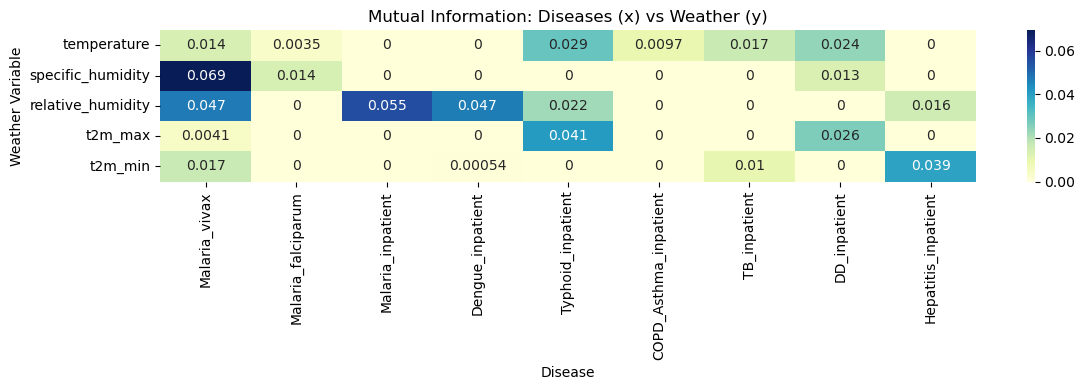

In [44]:
!pip install pingouin


            n         r          CI95%     p-val
spearman  120 -0.044086  [-0.22, 0.14]  0.635479


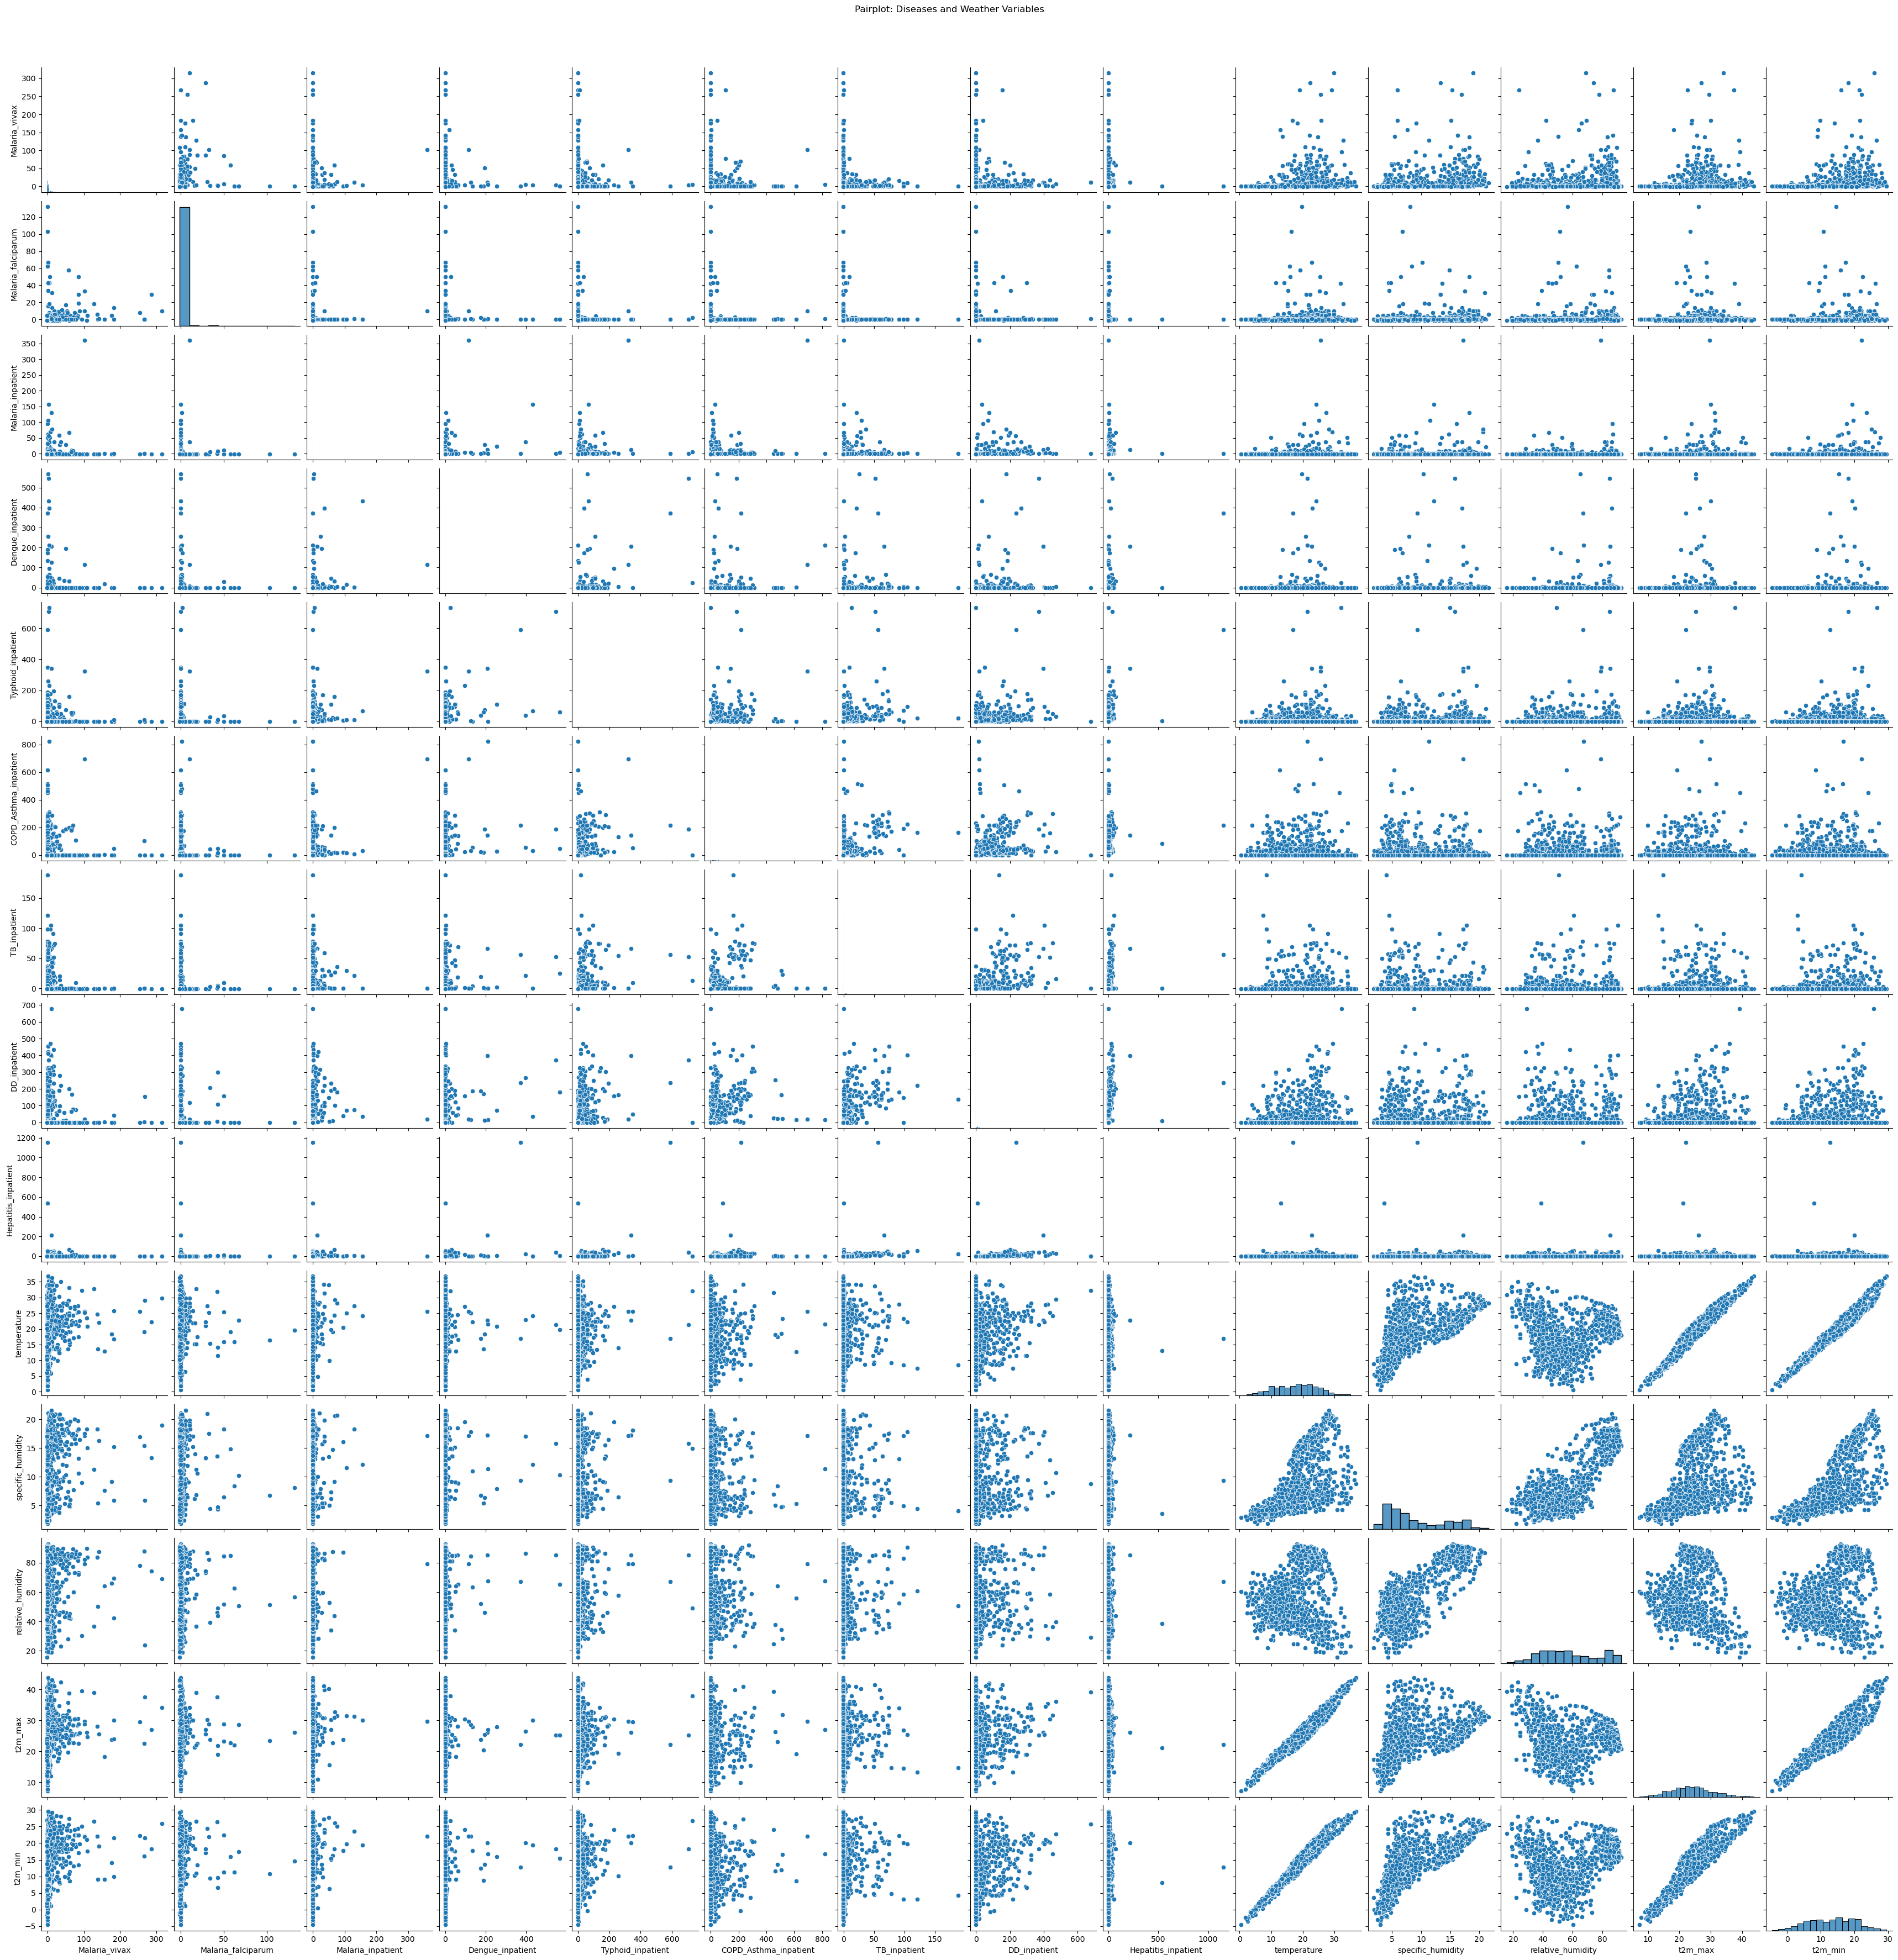

In [26]:
sns.pairplot(final_df[disease_cols + weather_vars])
plt.suptitle("Pairplot: Diseases and Weather Variables", y=1.02)
plt.show()

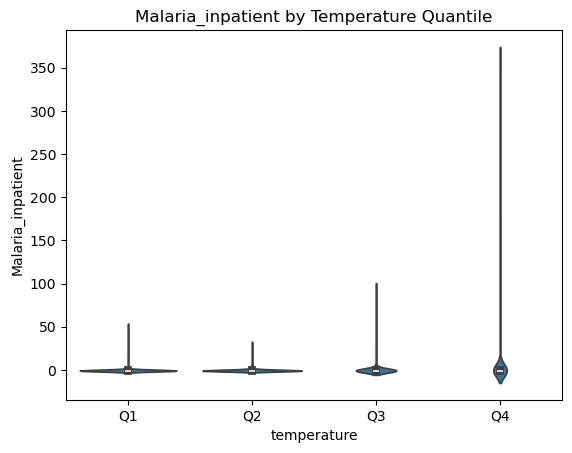

In [27]:
temp_quantiles = pd.qcut(final_df['temperature'], 4, labels=['Q1','Q2','Q3','Q4'])
sns.violinplot(x=temp_quantiles, y=final_df['Malaria_inpatient'])
plt.title("Malaria_inpatient by Temperature Quantile")
plt.show()

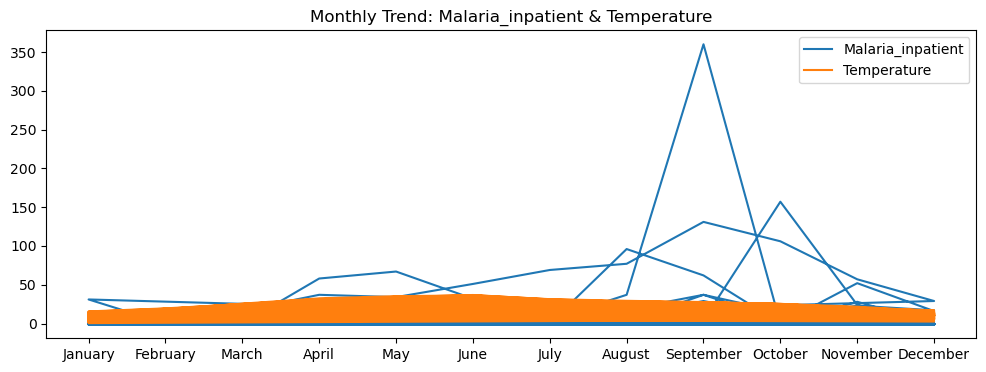

In [28]:
plt.figure(figsize=(12,4))
plt.plot(final_df['Month'], final_df['Malaria_inpatient'], label='Malaria_inpatient')
plt.plot(final_df['Month'], final_df['temperature'], label='Temperature')
plt.legend()
plt.title("Monthly Trend: Malaria_inpatient & Temperature")
plt.show()

# Suggested Plots to Reveal Correlations Between Diseases and Weather

To better understand the relationships between diseases and weather variables, consider the following visualizations:

1. **Scatter Plots with Regression Lines**  
   For each disease, plot a scatter plot against each weather variable (e.g., Malaria vs. Temperature), with a regression line to visualize linear relationships.

2. **Pairplot (Seaborn)**  
   Use seaborn's `pairplot` to visualize pairwise relationships between all diseases and weather variables for a selected district or the combined dataset.

3. **Monthly/Seasonal Trends**  
   Plot average disease cases and weather variables by month to see if there are seasonal patterns.

4. **Correlation Matrix (Already Done)**  
   The heatmap is good, but you can also show the top correlated pairs as a ranked list.

5. **Lagged Correlation Analysis**  
   Sometimes weather affects diseases with a delay. Plot correlations between weather variables and disease cases with 1-3 month lags.

6. **Boxplots by Weather Quantiles**  
   Divide a weather variable (e.g., temperature) into quantiles and plot boxplots of disease cases for each quantile.

Below are example code snippets for some of these plots.

In [ ]:
# 1. Scatter plots with regression lines for each disease-weather pair
import seaborn as sns
import matplotlib.pyplot as plt

for disease in disease_cols:
    for weather in weather_cols:
        plt.figure(figsize=(6,4))
        sns.regplot(data=full_df, x=weather, y=disease, scatter_kws={'alpha':0.5})
        plt.title(f"{disease} vs. {weather}")
        plt.xlabel(weather)
        plt.ylabel(disease)
        plt.tight_layout()
        plt.show()

In [ ]:
# 2. Pairplot for all diseases and weather variables (may be slow for large data)
sns.pairplot(full_df[disease_cols + weather_cols])
plt.suptitle("Pairplot: Diseases and Weather Variables", y=1.02)
plt.show()

In [ ]:
# 3. Monthly/Seasonal trends: Average disease cases and weather by month
monthly = full_df.groupby('Month')[disease_cols + weather_cols].mean().reset_index()
monthly = monthly.set_index('Month').reindex([
    'January','February','March','April','May','June','July','August','September','October','November','December'
])

fig, axes = plt.subplots(len(disease_cols), 1, figsize=(12, 4*len(disease_cols)), sharex=True)
if len(disease_cols) == 1:
    axes = [axes]
for i, disease in enumerate(disease_cols):
    monthly[disease].plot(ax=axes[i], marker='o', label=disease)
    axes[i].set_ylabel("Avg Cases")
    axes[i].set_title(f"Monthly Trend: {disease}")
    axes[i].legend()
plt.xlabel("Month")
plt.tight_layout()
plt.show()

In [ ]:
# 4. Top correlated pairs (absolute value, excluding self-correlation)
corr_pairs = corr.abs().unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # exclude self-correlation
print("Top correlated disease-weather pairs:")
print(corr_pairs.head(10))

In [ ]:
# 5. Lagged correlation: Weather variable vs. disease cases with 1-month lag
for disease in disease_cols:
    for weather in weather_cols:
        shifted = full_df[[disease, weather]].copy()
        shifted[weather] = shifted[weather].shift(1)
        corr_lag = shifted.corr().iloc[0,1]
        print(f"Lag-1 correlation between {disease} and previous month's {weather}: {corr_lag:.2f}")

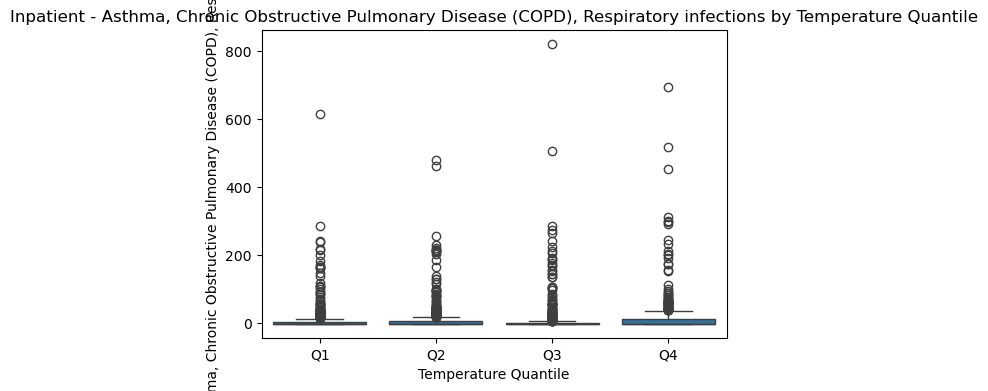

In [5]:
# 6. Boxplots of disease cases by temperature quantiles
temp_quantiles = pd.qcut(full_df['Temperature'], 4, labels=['Q1','Q2','Q3','Q4'])
for disease in disease_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=temp_quantiles, y=full_df[disease])
    plt.title(f"{disease} by Temperature Quantile")
    plt.xlabel("Temperature Quantile")
    plt.ylabel(disease)
    plt.show()